In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('StockDailyData.csv')
df
df.head()

stck_bsop_date  stck_clpr  stck_oprc  stck_hgpr  stck_lwpr   acml_vol  \
0      20120410.0     4775.0     4700.0     5010.0     4505.0   662202.0   
1      20120409.0     4715.0     5250.0     5270.0     4600.0   914261.0   
2      20120406.0     5290.0     5230.0     5380.0     5190.0   597011.0   
3      20120405.0     5220.0     5280.0     5420.0     5080.0   863745.0   
4      20120404.0     5490.0     5560.0     5750.0     5200.0  1095521.0   

   acml_tr_pbmn  flng_cls_code  prtt_rate mod_yn  prdy_vrss_sign  prdy_vrss  \
0  3.187791e+09            0.0        0.0      N             2.0       60.0   
1  4.464435e+09            0.0        0.0      N             5.0     -575.0   
2  3.148330e+09            0.0        0.0      N             2.0       70.0   
3  4.525082e+09            0.0        0.0      N             5.0     -270.0   
4  5.928380e+09            0.0        0.0      N             5.0     -190.0   

   revl_issu_reas  stock_code company  
0             NaN       35900     JYP  
1             NaN       35900     JYP  
2             NaN       35900     JYP  
3             NaN       35900     JYP  
4             NaN       35900     JYP

In [10]:
# Data shape
print(df.shape)
# Data 통계량
print(df.describe())

(43114, 15)
       stck_bsop_date     stck_clpr     stck_oprc     stck_hgpr     stck_lwpr  \
count    3.745800e+04  3.745800e+04  3.745800e+04  3.745800e+04  3.745800e+04   
mean     2.017861e+07  2.601529e+05  2.602252e+05  2.637377e+05  2.566358e+05   
std      3.352752e+04  4.079099e+05  4.079846e+05  4.122322e+05  4.034933e+05   
min      2.012010e+07  3.870000e+03  3.825000e+03  4.030000e+03  3.790000e+03   
25%      2.015062e+07  4.105000e+04  4.116250e+04  4.190000e+04  4.040000e+04   
50%      2.018080e+07  1.023000e+05  1.025000e+05  1.043000e+05  1.008000e+05   
75%      2.021030e+07  2.315000e+05  2.318000e+05  2.355000e+05  2.275000e+05   
max      2.023091e+07  2.861000e+06  2.875000e+06  2.876000e+06  2.838000e+06   

           acml_vol  acml_tr_pbmn  flng_cls_code     prtt_rate  \
count  3.745800e+04  3.745800e+04   37458.000000  37458.000000   
mean   1.344763e+06  1.378762e+11       0.013161     -0.004143   
std    3.393854e+06  2.613511e+11       0.205805      0.4005

In [12]:
# 결측치 개수 파악
df.isnull().sum().to_frame('nan_count')

nan_count
stck_bsop_date       5656
stck_clpr            5656
stck_oprc            5656
stck_hgpr            5656
stck_lwpr            5656
acml_vol             5656
acml_tr_pbmn         5656
flng_cls_code        5656
prtt_rate            5656
mod_yn               5656
prdy_vrss_sign       5656
prdy_vrss            5656
revl_issu_reas      43114
stock_code              0
company                 0

In [13]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df), columns=['nan_ratio'])

nan_ratio
stck_bsop_date   0.131187
stck_clpr        0.131187
stck_oprc        0.131187
stck_hgpr        0.131187
stck_lwpr        0.131187
acml_vol         0.131187
acml_tr_pbmn     0.131187
flng_cls_code    0.131187
prtt_rate        0.131187
mod_yn           0.131187
prdy_vrss_sign   0.131187
prdy_vrss        0.131187
revl_issu_reas   1.000000
stock_code       0.000000
company          0.000000

In [ ]:
# 결측치 100% "revl_issu_reas: 재평가사유코드" 제거
df = df.drop(columns=['revl_issu_reas'])

Text(0.5, 1.0, 'Total Missing Value (%)')

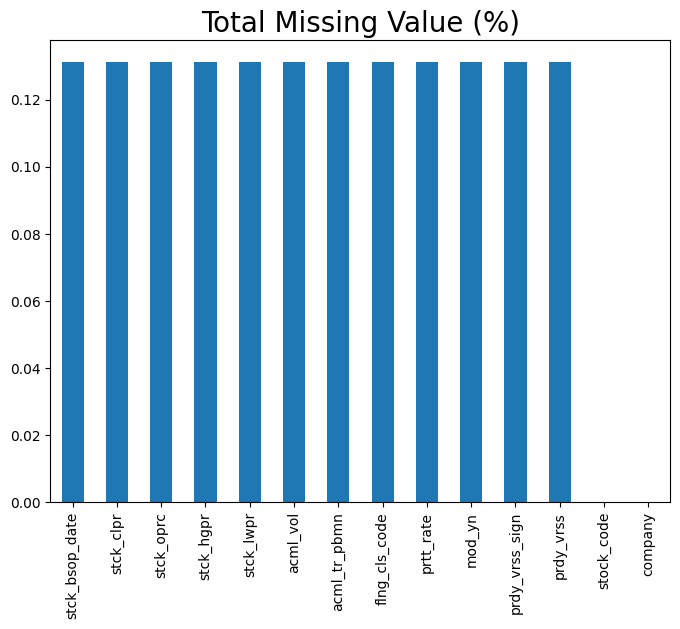

In [27]:
# 결측치 시각화
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

/tmp/ipykernel_262/436395322.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heatmap_data.corr(), linewidths = 0.1, vmax = 1.0,


<AxesSubplot: title={'center': 'Correlation with Missing Values'}>

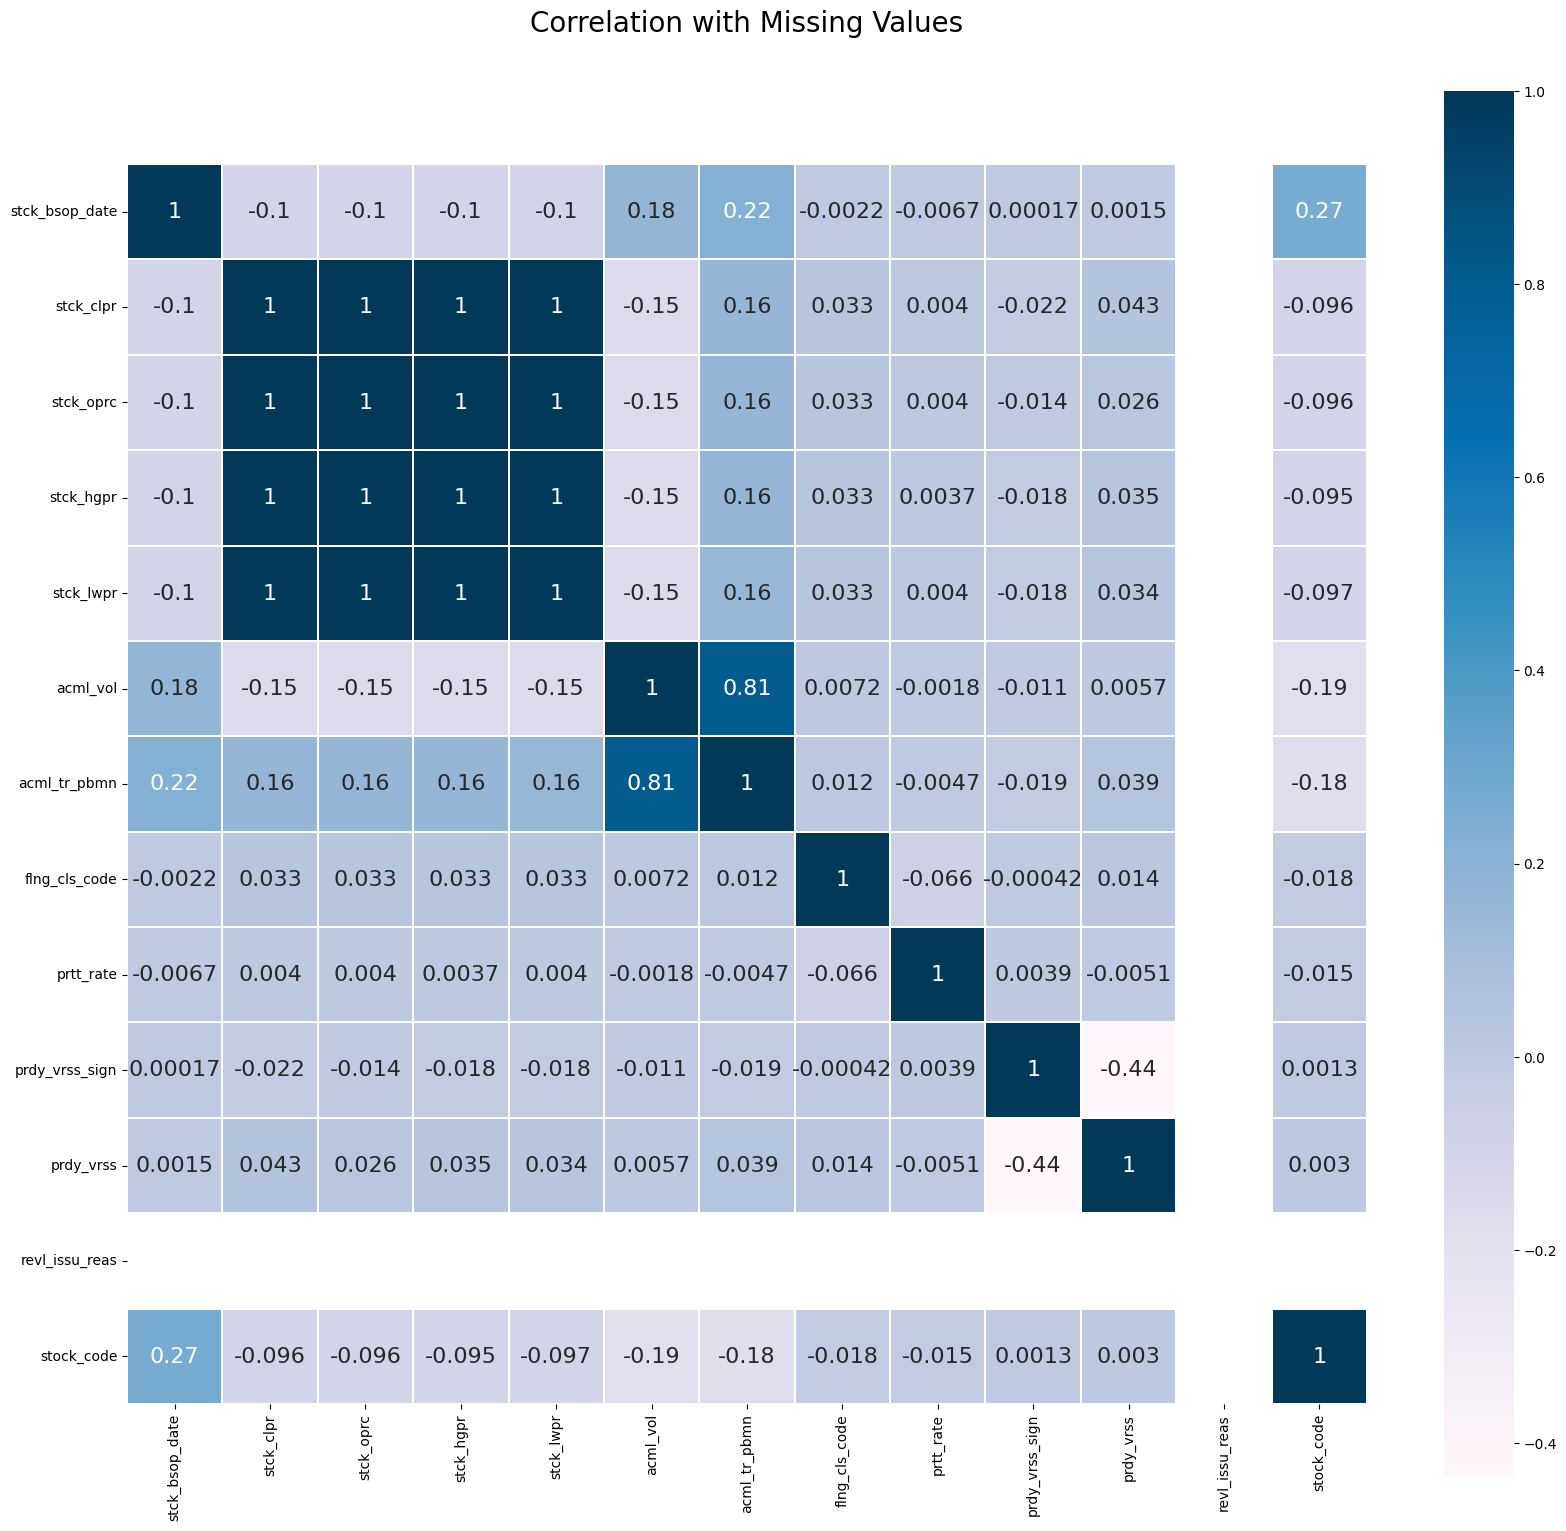

In [25]:
# 결측치 상관관계
# import missingno as msno
# import matplotlib.pyplot as plt
# import pandas as pd
# df = pd.read_csv("StockDailyData.csv")
# missing_data = df.columns[df.isnull().any()].tolist()
# msno.heatmap(df[missing_data], figsize=(8,6))
# plt.title("Correlation with Missing Values", fontsize = 20)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("StockDailyData.csv")
heatmap_data = df
colormap = plt.cm.PuBu
plt.figure(figsize=(20,18))
plt.title("Correlation with Missing Values", y = 1.1,size = 20)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


In [42]:
df.corr()

/tmp/ipykernel_90/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


stck_bsop_date  stck_clpr  stck_oprc  stck_hgpr  stck_lwpr  \
stck_bsop_date        1.000000  -0.103250  -0.103307  -0.101990  -0.104277   
stck_clpr            -0.103250   1.000000   0.999794   0.999897   0.999902   
stck_oprc            -0.103307   0.999794   1.000000   0.999886   0.999901   
stck_hgpr            -0.101990   0.999897   0.999886   1.000000   0.999846   
stck_lwpr            -0.104277   0.999902   0.999901   0.999846   1.000000   
acml_vol              0.175271  -0.153132  -0.153306  -0.153114  -0.153217   
acml_tr_pbmn          0.224603   0.160187   0.159645   0.162448   0.158069   
flng_cls_code        -0.002249   0.033116   0.033021   0.033017   0.033223   
prtt_rate            -0.006694   0.003979   0.003973   0.003743   0.004002   
prdy_vrss_sign        0.000172  -0.022075  -0.014469  -0.018184  -0.018230   
prdy_vrss             0.001506   0.043196   0.026154   0.034706   0.034144   
stock_code            0.266303  -0.095966  -0.096042  -0.094513  -0.097193   

                acml_vol  acml_tr_pbmn  flng_cls_code  prtt_rate  \
stck_bsop_date  0.175271      0.224603      -0.002249  -0.006694   
stck_clpr      -0.153132      0.160187       0.033116   0.003979   
stck_oprc      -0.153306      0.159645       0.033021   0.003973   
stck_hgpr      -0.153114      0.162448       0.033017   0.003743   
stck_lwpr      -0.153217      0.158069       0.033223   0.004002   
acml_vol        1.000000      0.810620       0.007242  -0.001815   
acml_tr_pbmn    0.810620      1.000000       0.011742  -0.004691   
flng_cls_code   0.007242      0.011742       1.000000  -0.066187   
prtt_rate      -0.001815     -0.004691      -0.066187   1.000000   
prdy_vrss_sign -0.010616     -0.019218      -0.000417   0.003902   
prdy_vrss       0.005743      0.038639       0.014487  -0.005134   
stock_code     -0.188412     -0.178247      -0.017583  -0.014951   

                prdy_vrss_sign  prdy_vrss  stock_code  
stck_bsop_date        0.000172   0.001506    0.266303  
stck_clpr            -0.022075   0.043196   -0.095966  
stck_oprc            -0.014469   0.026154   -0.096042  
stck_hgpr            -0.018184   0.034706   -0.094513  
stck_lwpr            -0.018230   0.034144   -0.097193  
acml_vol             -0.010616   0.005743   -0.188412  
acml_tr_pbmn         -0.019218   0.038639   -0.178247  
flng_cls_code        -0.000417   0.014487   -0.017583  
prtt_rate             0.003902  -0.005134   -0.014951  
prdy_vrss_sign        1.000000  -0.435217    0.001267  
prdy_vrss            -0.435217   1.000000    0.002977  
stock_code            0.001267   0.002977    1.000000

In [33]:
# 결측치 개수
df.isnull().sum().to_frame('nan_count')

nan_count
stck_bsop_date       5656
stck_clpr            5656
stck_oprc            5656
stck_hgpr            5656
stck_lwpr            5656
acml_vol             5656
acml_tr_pbmn         5656
flng_cls_code        5656
prtt_rate            5656
mod_yn               5656
prdy_vrss_sign       5656
prdy_vrss            5656
stock_code              0
company                 0

In [34]:
# 변수 타입 파악
df.dtypes
# 1열 date로 바꾸기

stck_bsop_date    float64
stck_clpr         float64
stck_oprc         float64
stck_hgpr         float64
stck_lwpr         float64
acml_vol          float64
acml_tr_pbmn      float64
flng_cls_code     float64
prtt_rate         float64
mod_yn             object
prdy_vrss_sign    float64
prdy_vrss         float64
stock_code          int64
company            object
dtype: object

In [59]:
# Company column에 저장된 회사 종류
company_types = df['company'].unique()
formatted_output = ', '.join(['"' + company + '"' for company in company_types])
print('[' + formatted_output + ']')

["JYP", "SK하이닉스", "삼성SDI", "삼성바이오로직스", "삼성전자우", "셀트리온제약", "셀트리온헬스케어", "에코프로", "에코프로비엠", "엘앤에프", "펄어비스", "현대차", "삼성전자", "카카오", "네이버"]


In [30]:
from tabulate import tabulate
# stock_code와 company 열을 제외한 모든 열 선택
columns_to_check = df.columns.difference(['stock_code', 'company'])

# 해당 열들이 모두 NaN인 행만 선택
filtered_df = df[df[columns_to_check].isnull().all(axis=1)]

# company 별로 개수 집계
result = filtered_df['company'].value_counts().reset_index()
result.columns = ['company', 'count']

# 결과 출력
print("<stock_code와 company 열을 제외하고 모든 행의 값이 Nan인 행들의 개수>")
print(tabulate(result, headers='keys', tablefmt='grid'))

<stock_code와 company 열을 제외하고 모든 행의 값이 Nan인 행들의 개수>
+----+------------------+---------+
|    | company          |   count |
+====+==================+=========+
|  0 | 에코프로비엠     |    1735 |
+----+------------------+---------+
|  1 | 펄어비스         |    1387 |
+----+------------------+---------+
|  2 | 셀트리온헬스케어 |    1354 |
+----+------------------+---------+
|  3 | 삼성바이오로직스 |    1180 |
+----+------------------+---------+


In [77]:
# 위에서 표시한 행들 제거
columns_to_check = df.columns.difference(['stock_code', 'company'])
# 해당 열들이 모두 NaN인 행을 제외하고 새로운 df에 저장
df = df.dropna(subset=columns_to_check, how='all')

In [80]:
# 결측치 제거 후
df.isnull().sum().to_frame('nan_count')

nan_count
stck_bsop_date          0
stck_clpr               0
stck_oprc               0
stck_hgpr               0
stck_lwpr               0
acml_vol                0
acml_tr_pbmn            0
flng_cls_code           0
prtt_rate               0
mod_yn                  0
prdy_vrss_sign          0
prdy_vrss               0
stock_code              0
company                 0

In [81]:
# 결측치 제거 후 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df), columns=['nan_ratio'])

nan_ratio
stck_bsop_date        0.0
stck_clpr             0.0
stck_oprc             0.0
stck_hgpr             0.0
stck_lwpr             0.0
acml_vol              0.0
acml_tr_pbmn          0.0
flng_cls_code         0.0
prtt_rate             0.0
mod_yn                0.0
prdy_vrss_sign        0.0
prdy_vrss             0.0
stock_code            0.0
company               0.0

In [82]:
df

stck_bsop_date  stck_clpr  stck_oprc  stck_hgpr  stck_lwpr   acml_vol  \
0          20120410.0     4775.0     4700.0     5010.0     4505.0   662202.0   
1          20120409.0     4715.0     5250.0     5270.0     4600.0   914261.0   
2          20120406.0     5290.0     5230.0     5380.0     5190.0   597011.0   
3          20120405.0     5220.0     5280.0     5420.0     5080.0   863745.0   
4          20120404.0     5490.0     5560.0     5750.0     5200.0  1095521.0   
...               ...        ...        ...        ...        ...        ...   
43109      20230821.0   214500.0   213000.0   218000.0   213000.0   691652.0   
43110      20230818.0   212500.0   213500.0   217500.0   211000.0   886686.0   
43111      20230817.0   218000.0   221000.0   222000.0   216000.0   880587.0   
43112      20230816.0   222500.0   219500.0   225500.0   218000.0   943493.0   
43113      20230814.0   221000.0   222500.0   224500.0   220500.0   572079.0   

       acml_tr_pbmn  flng_cls_code  prtt_rate mod_yn  prdy_vrss_sign  \
0      3.187791e+09            0.0        0.0      N             2.0   
1      4.464435e+09            0.0        0.0      N             5.0   
2      3.148330e+09            0.0        0.0      N             2.0   
3      4.525082e+09            0.0        0.0      N             5.0   
4      5.928380e+09            0.0        0.0      N             5.0   
...             ...            ...        ...    ...             ...   
43109  1.491806e+11            0.0        0.0      N             2.0   
43110  1.890973e+11            0.0        0.0      N             5.0   
43111  1.921145e+11            0.0        0.0      N             5.0   
43112  2.099212e+11            0.0        0.0      N             2.0   
43113  1.269515e+11            0.0        0.0      N             5.0   

       prdy_vrss  stock_code company  
0           60.0       35900     JYP  
1         -575.0       35900     JYP  
2           70.0       35900     JYP  
3         -270.0       35900     JYP  
4         -190.0       35900     JYP  
...          ...         ...     ...  
43109     2000.0       35420     네이버  
43110    -5500.0       35420     네이버  
43111    -4500.0       35420     네이버  
43112     1500.0       35420     네이버  
43113    -1000.0       35420     네이버  

[37458 rows x 14 columns]

In [84]:
df.to_csv('cleaned_StockDailyData.csv', index=False)
'''
작업한 것
stock_code, company를 제외한 모든 열의 값이 NaN인 행들을 제거
모든 값이 NaN인 revl_issu_reas 열 제거
'''

In [85]:
print(df.describe())

       stck_bsop_date     stck_clpr     stck_oprc     stck_hgpr     stck_lwpr  \
count    3.745800e+04  3.745800e+04  3.745800e+04  3.745800e+04  3.745800e+04   
mean     2.017861e+07  2.601529e+05  2.602252e+05  2.637377e+05  2.566358e+05   
std      3.352752e+04  4.079099e+05  4.079846e+05  4.122322e+05  4.034933e+05   
min      2.012010e+07  3.870000e+03  3.825000e+03  4.030000e+03  3.790000e+03   
25%      2.015062e+07  4.105000e+04  4.116250e+04  4.190000e+04  4.040000e+04   
50%      2.018080e+07  1.023000e+05  1.025000e+05  1.043000e+05  1.008000e+05   
75%      2.021030e+07  2.315000e+05  2.318000e+05  2.355000e+05  2.275000e+05   
max      2.023091e+07  2.861000e+06  2.875000e+06  2.876000e+06  2.838000e+06   

           acml_vol  acml_tr_pbmn  flng_cls_code     prtt_rate  \
count  3.745800e+04  3.745800e+04   37458.000000  37458.000000   
mean   1.344763e+06  1.378762e+11       0.013161     -0.004143   
std    3.393854e+06  2.613511e+11       0.205805      0.400581   
min   

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

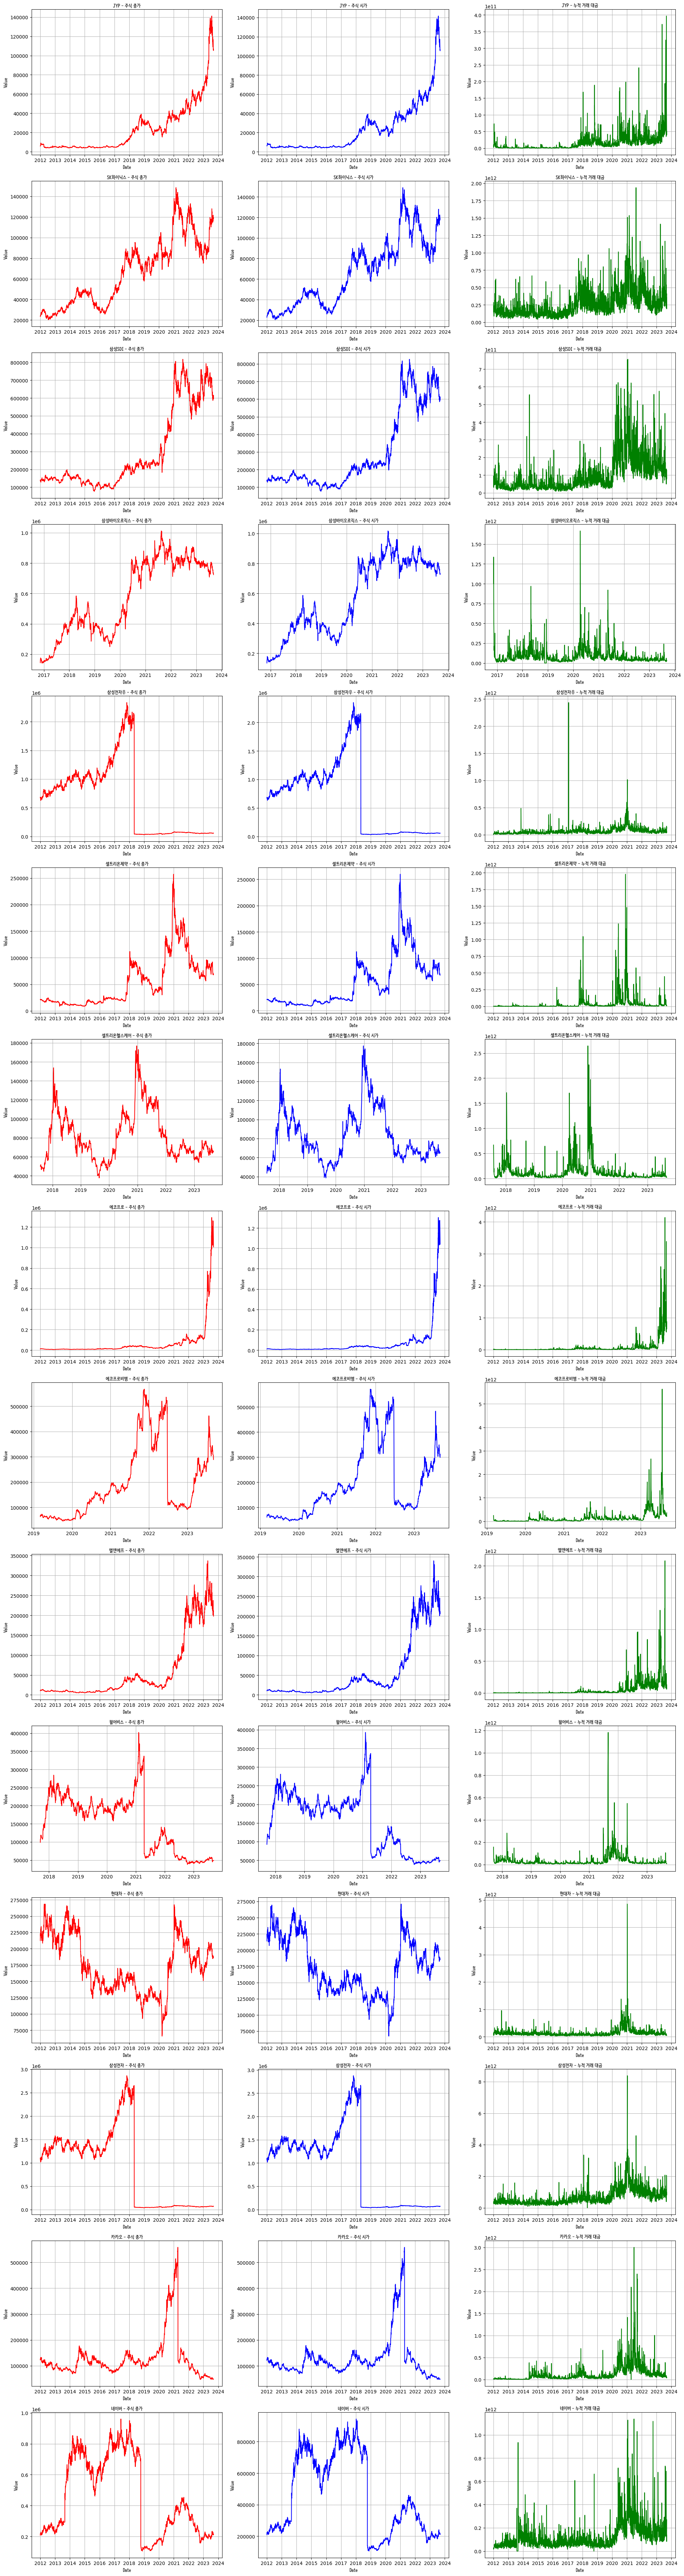

In [53]:
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
df = pd.read_csv("cleaned_StockDailyData.csv")
df['stck_bsop_date'] = pd.to_datetime(df['stck_bsop_date'], format='%Y-%m-%d')

# matplotlib의 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf"
font_prop = FontProperties(fname=font_path)

# 'stck_bsop_date' 열을 정확한 날짜 형식으로 변환
df['stck_bsop_date'] = pd.to_datetime(df['stck_bsop_date'], format='%Y%m%d')

columns_to_plot = ['stck_clpr', 'stck_oprc', 'acml_tr_pbmn']
column_names = ['주식 종가', '주식 시가', '누적 거래 대금']
colors = ['red', 'blue', 'green']
companies = df['company'].unique()

# 그래프 그리기
fig, axes = plt.subplots(len(companies), len(columns_to_plot), figsize=(20, 5*len(companies)))

for company_idx, company in enumerate(companies):
    company_df = df[df['company'] == company].sort_values(by='stck_bsop_date')
    
    for col_idx, (column, name, color) in enumerate(zip(columns_to_plot, column_names, colors)):
        if len(companies) > 1:
            ax = axes[company_idx, col_idx]
        else:
            ax = axes[col_idx]
        ax.plot(company_df['stck_bsop_date'], company_df[column], color=color)
        
        # x축 눈금 설정
        years = mdates.YearLocator()   # every year
        years_fmt = mdates.DateFormatter('%Y')
        ax.xaxis.set_major_locator(years)
        ax.xaxis.set_major_formatter(years_fmt)
        
        ax.set_title(f"{company} - {name}", fontproperties=font_prop)
        ax.set_xlabel('Date', fontproperties=font_prop)
        ax.set_ylabel('Value', fontproperties=font_prop)
        ax.grid(True)

plt.tight_layout()
plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

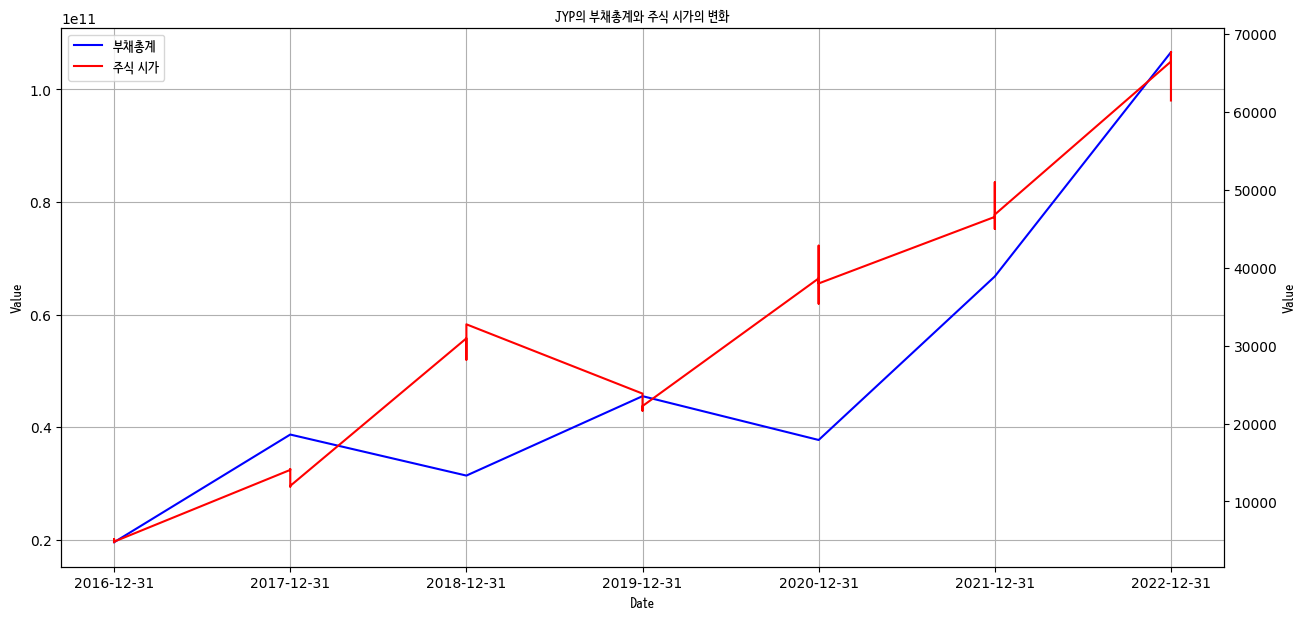

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

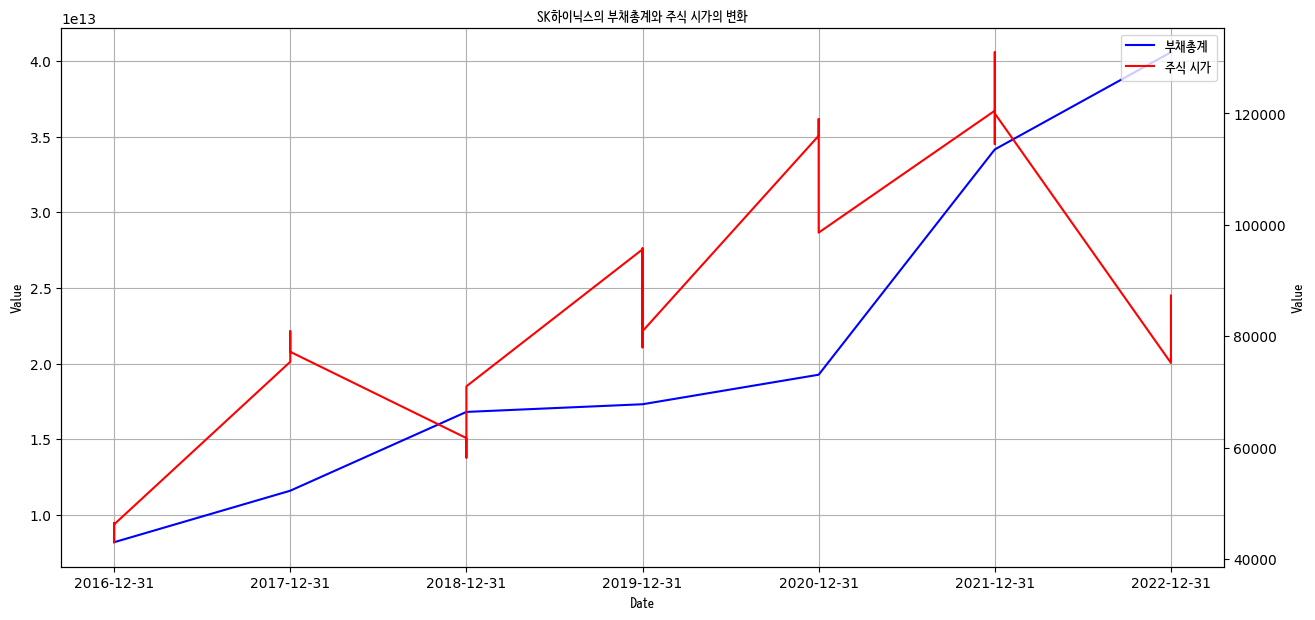

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

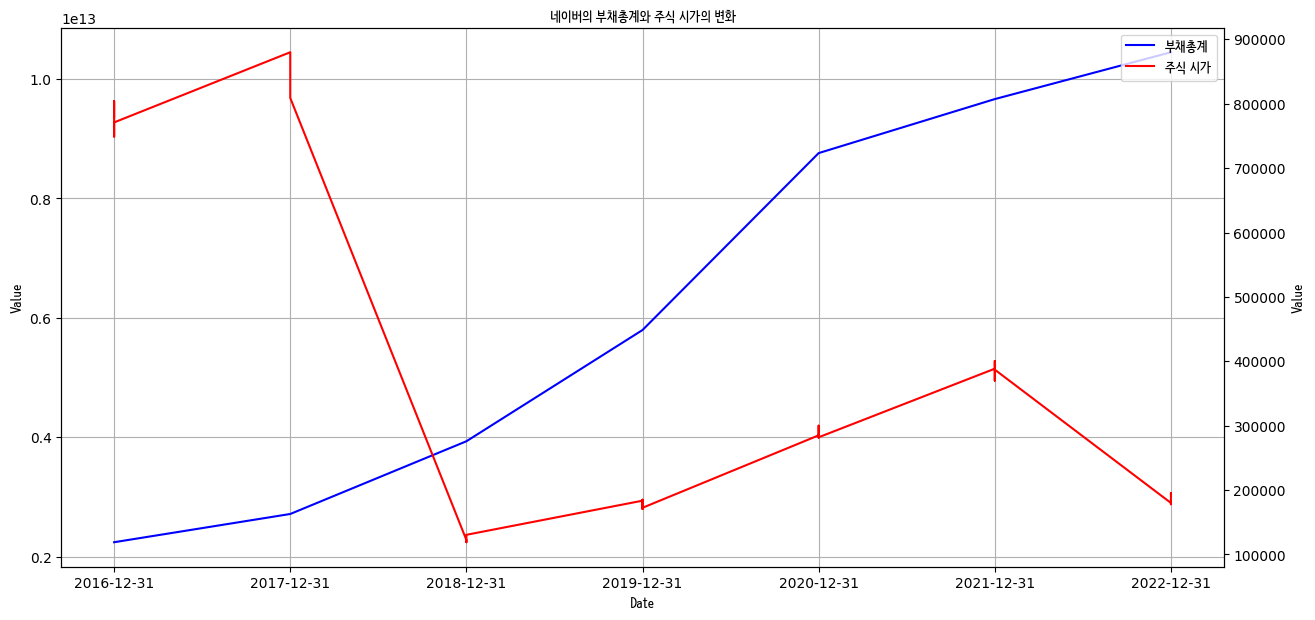

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

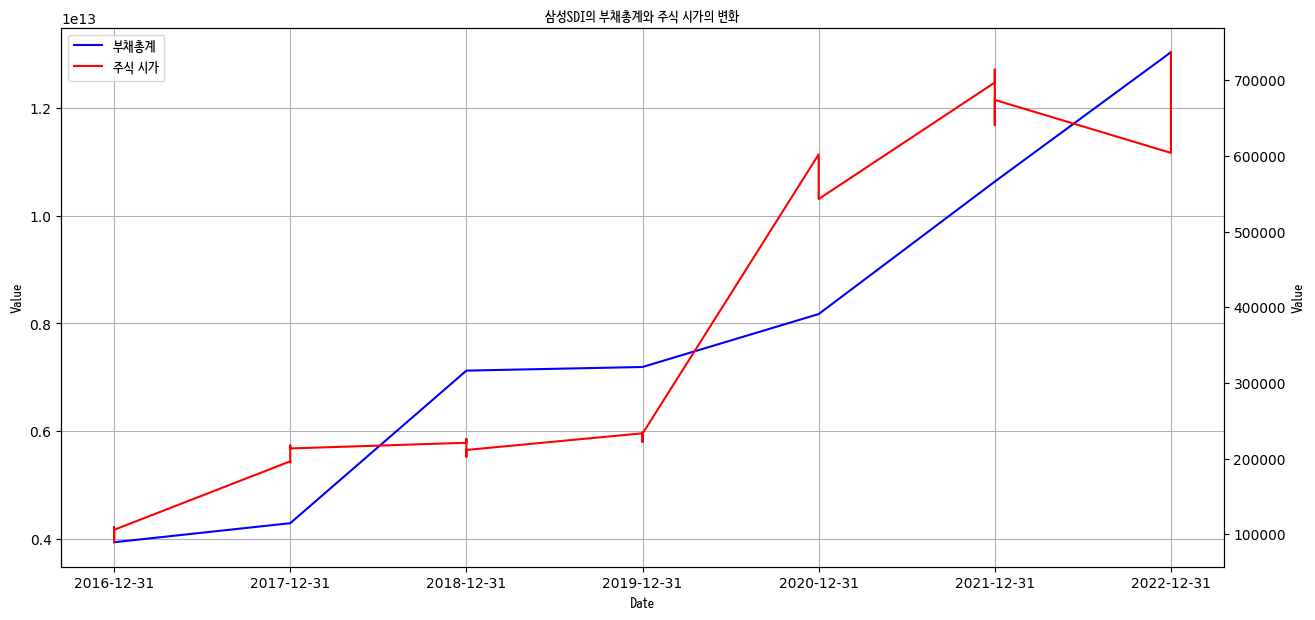

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

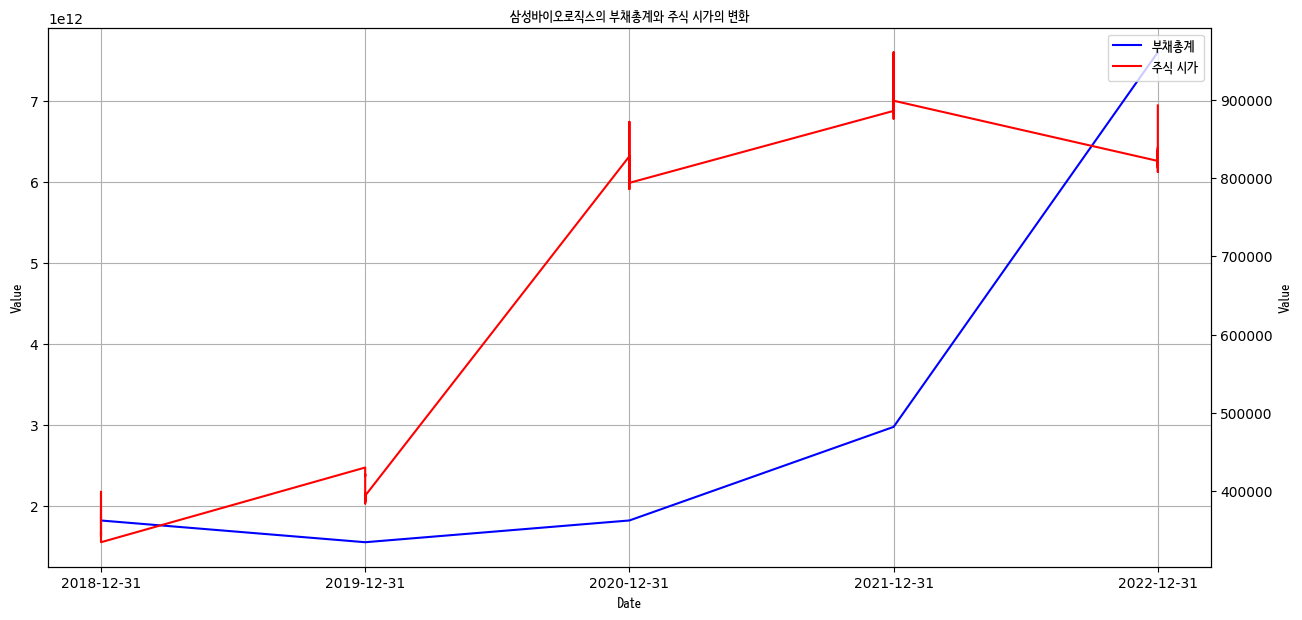

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

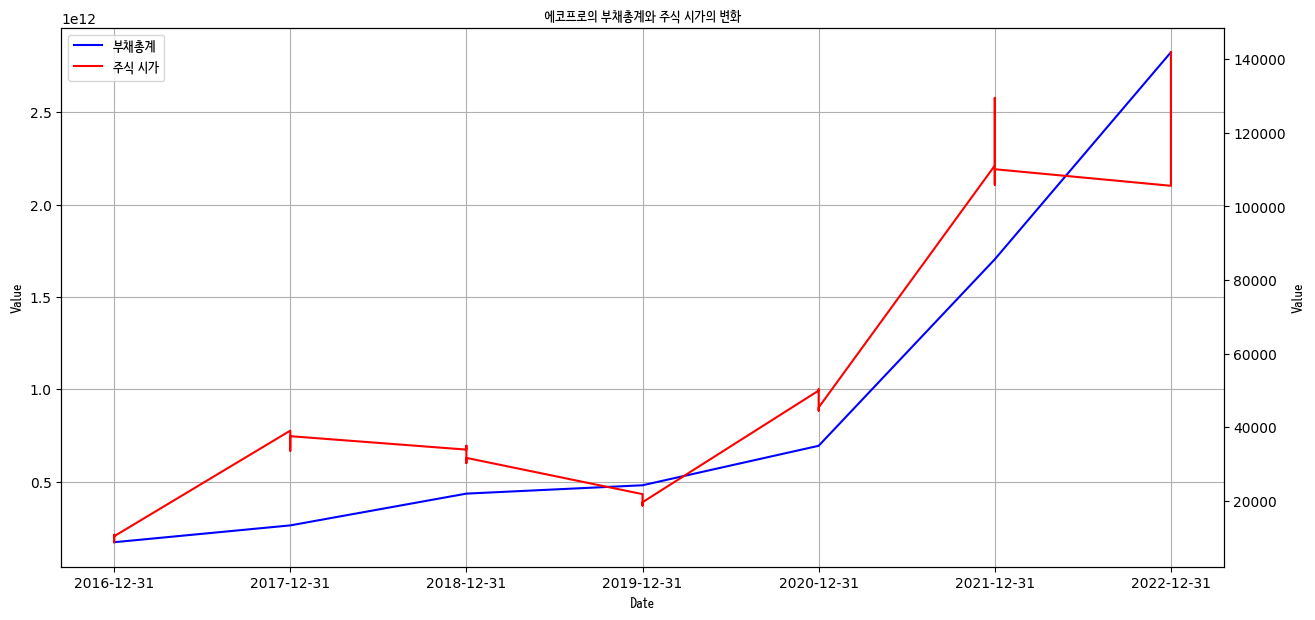

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

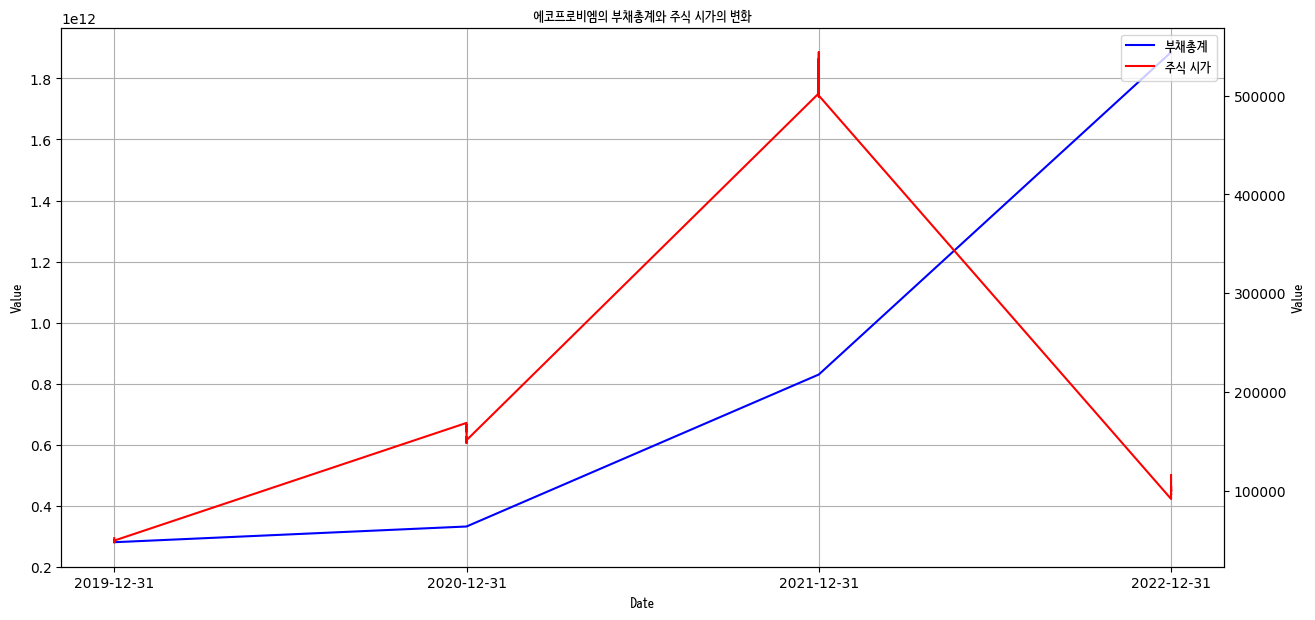

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

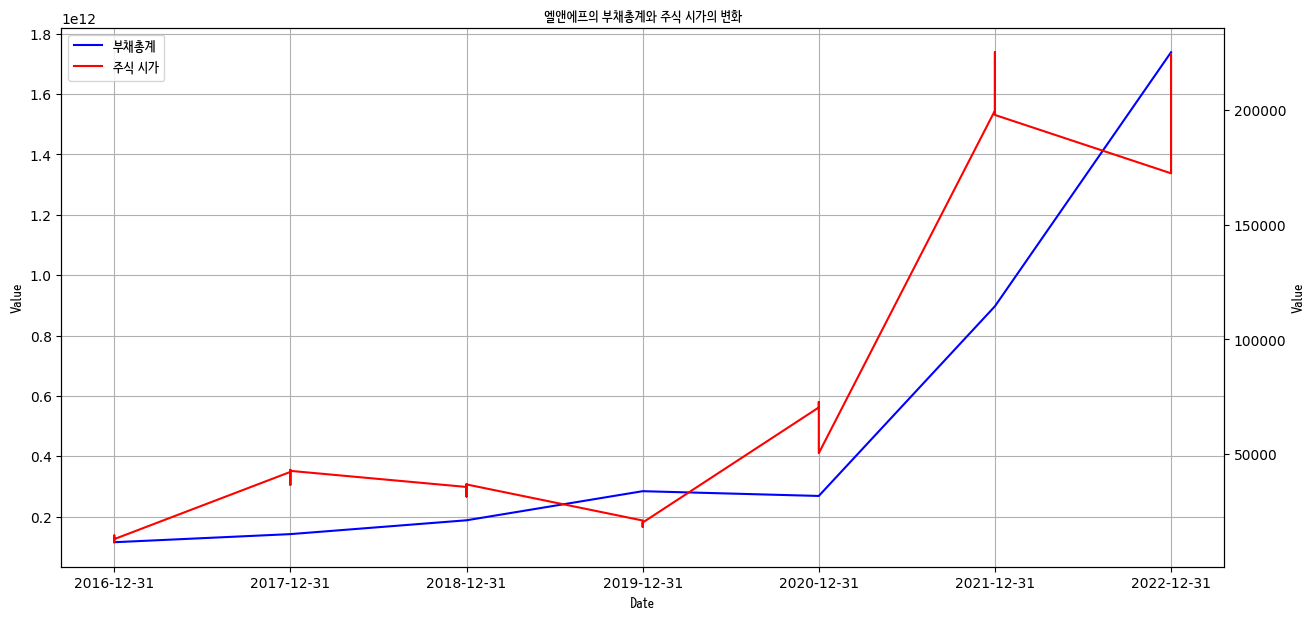

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

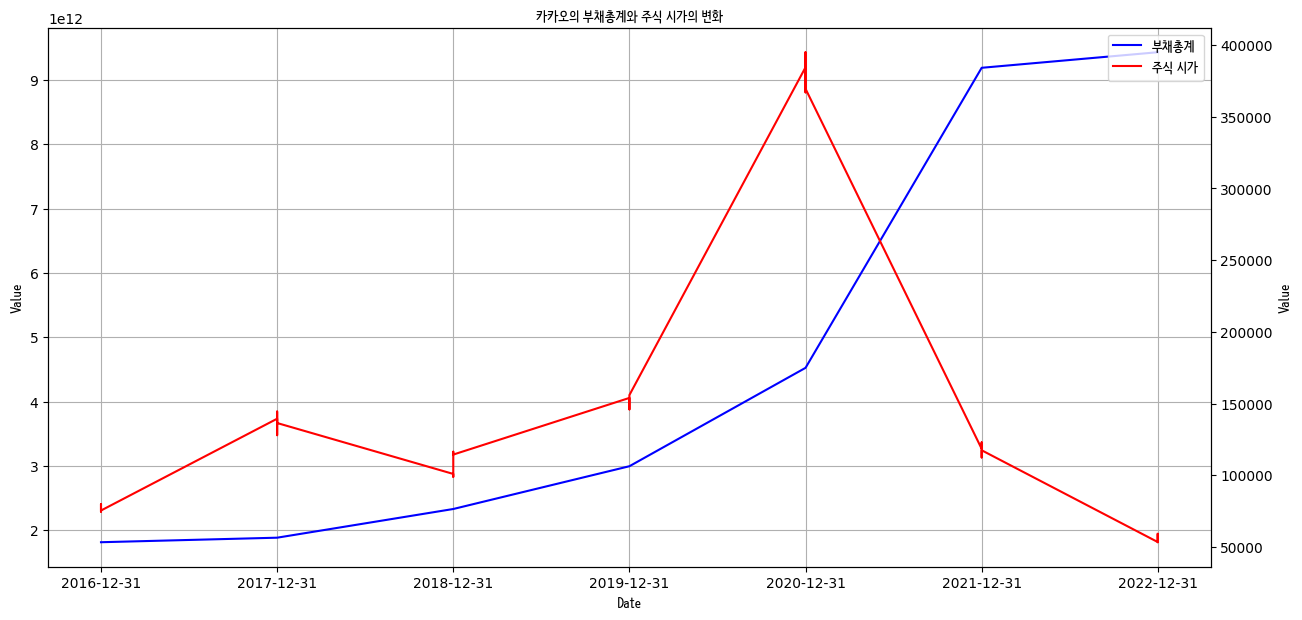

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

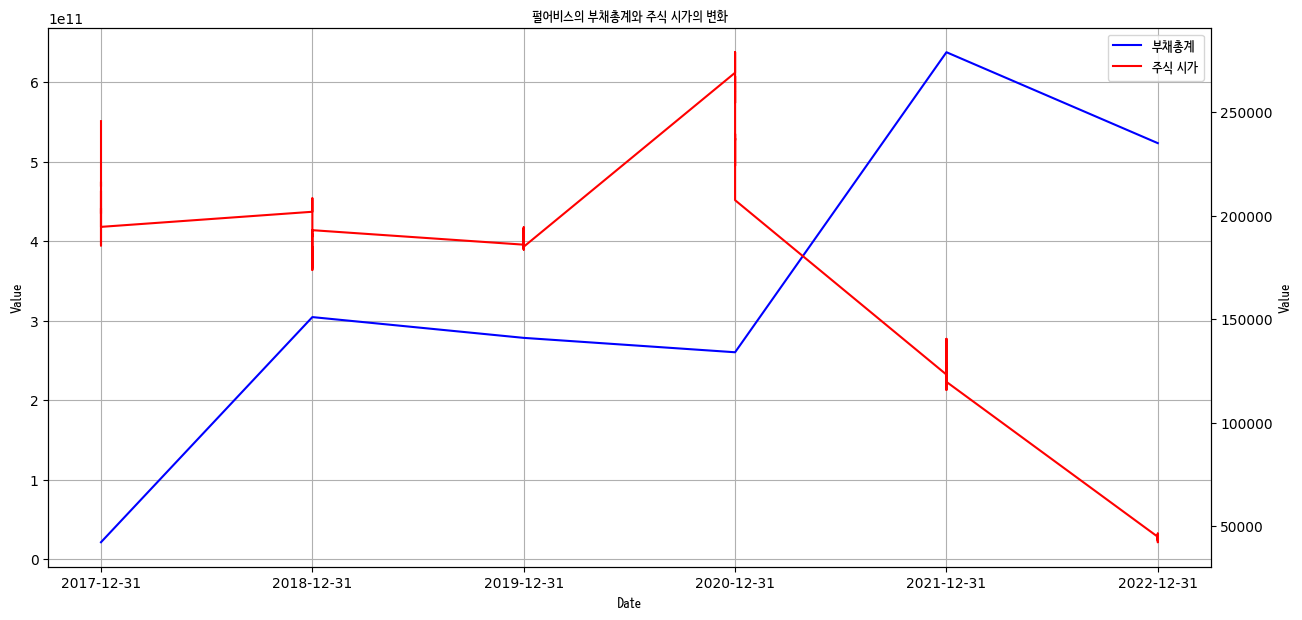

In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf"
font_prop = FontProperties(fname=font_path)
# 1. CSV 파일 읽기
finance_df = pd.read_csv('cleaned_AnnualFinanceStatement_eda.csv')
stock_df = pd.read_csv('cleaned_StockDailyData.csv')

finance_df.rename(columns={'Data': 'Date'}, inplace=True)
stock_df.rename(columns={'stck_bsop_date': 'Date'}, inplace=True)

finance_df['Year_Month'] = finance_df['Date'].str.slice(0, 7)
stock_df['Year_Month'] = stock_df['Date'].str.slice(0, 7)

# 'Year_Month'와 'company'를 기준으로 두 데이터프레임을 병합합니다.
merged_df = pd.merge(finance_df, stock_df, on=['Year_Month', 'company'], how='inner')
# 부채총계에 대한 조건 필터링
debt_total_df = merged_df[(merged_df['class1'] == '부채') & (merged_df['class2'] == '부채총계')]

companies = debt_total_df['company'].unique()

for company in companies:
    company_df = debt_total_df[debt_total_df['company'] == company]
    
    fig, ax1 = plt.subplots(figsize=(15, 7))
    
    # finance_statement(부채총계) 그래프
    ax1.plot(company_df['Date_x'], company_df['finance_statement'], label='부채총계', color='blue')
    ax1.set_ylabel('Value', fontproperties=font_prop)
    ax1.tick_params(axis='y')
    
    # stck_oprc(주식 시가) 그래프
    ax2 = ax1.twinx()  # ax1과 x축을 공유하는 두 번째 y축 생성
    ax2.plot(company_df['Date_x'], company_df['stck_oprc'], label='주식 시가', color='red')
    ax2.set_ylabel('Value', fontproperties=font_prop)
    ax2.tick_params(axis='y')
    
    ax1.set_xlabel('Date', fontproperties=font_prop)
    ax1.set_title(f'{company}의 부채총계와 주식 시가의 변화', fontproperties=font_prop)
    
    # 범례 추가
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0, prop=font_prop)

    ax1.grid(True)
    plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

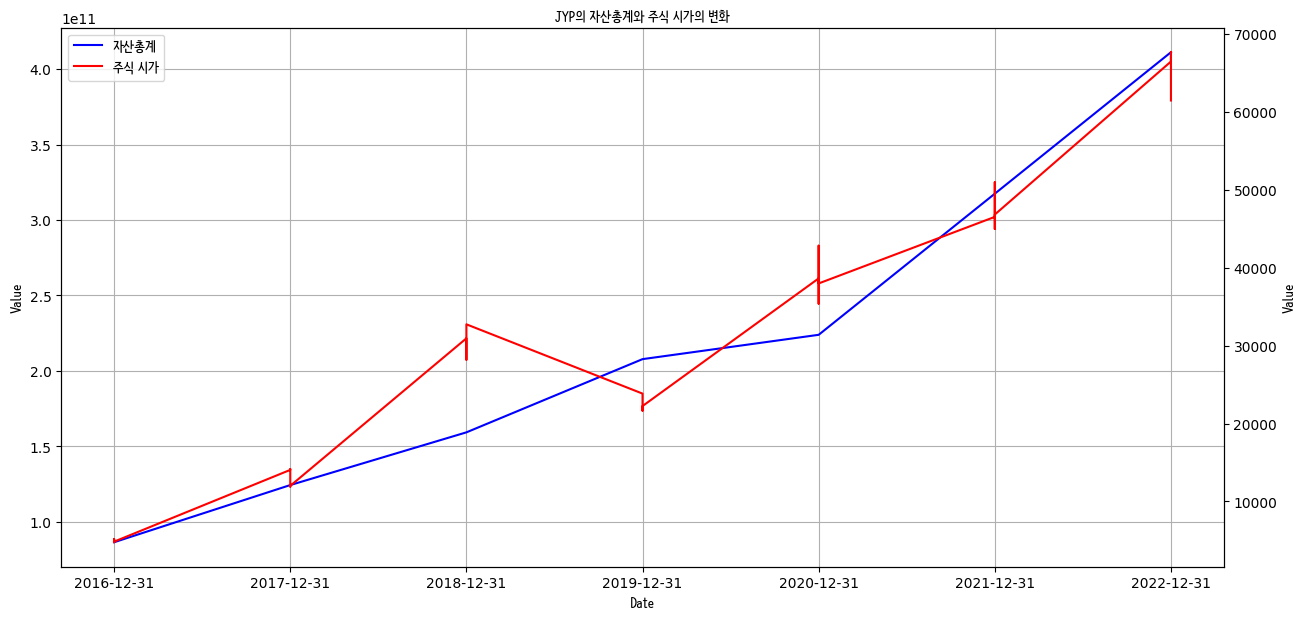

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

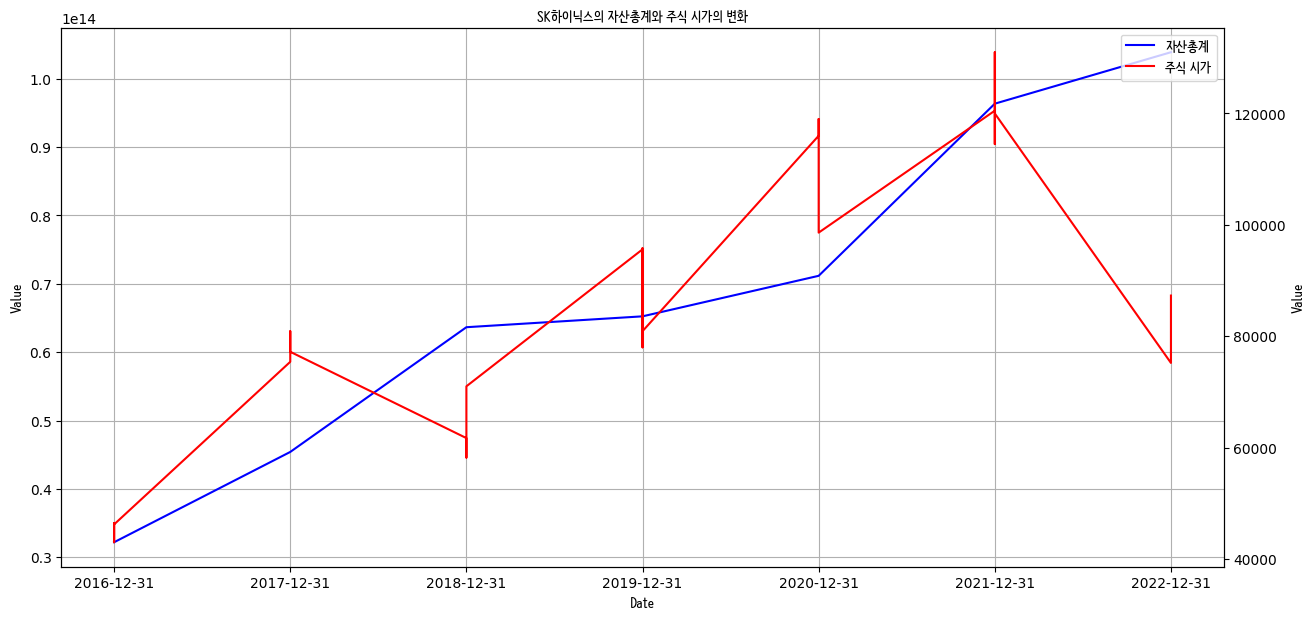

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

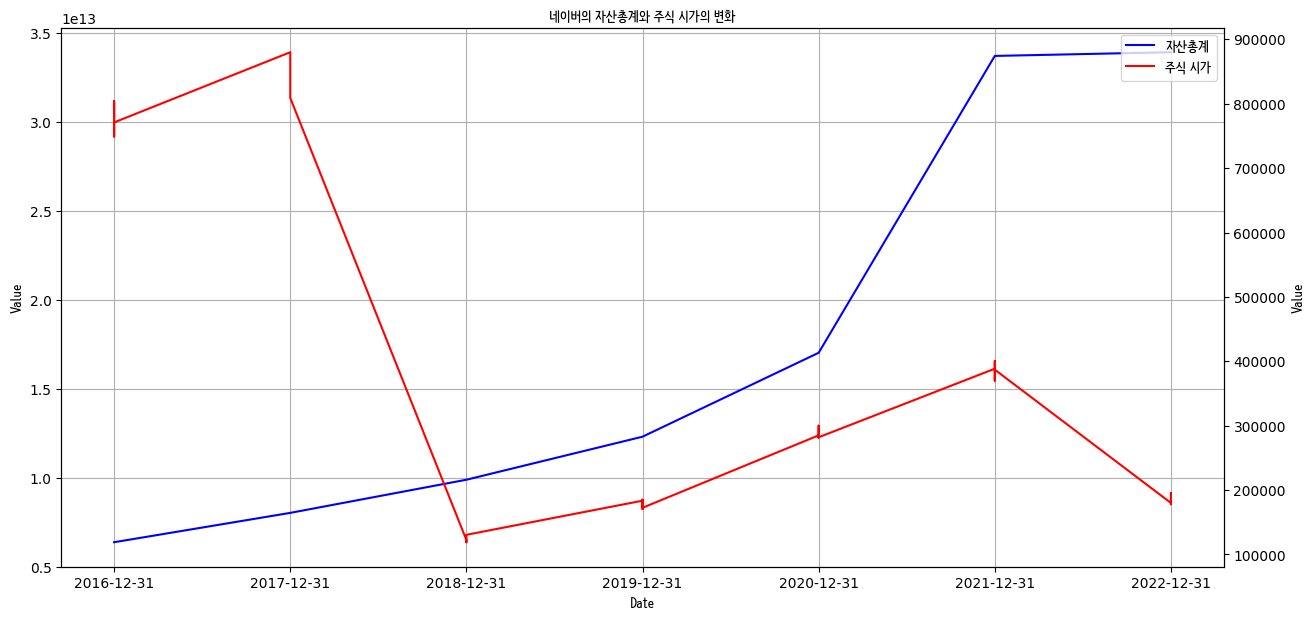

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

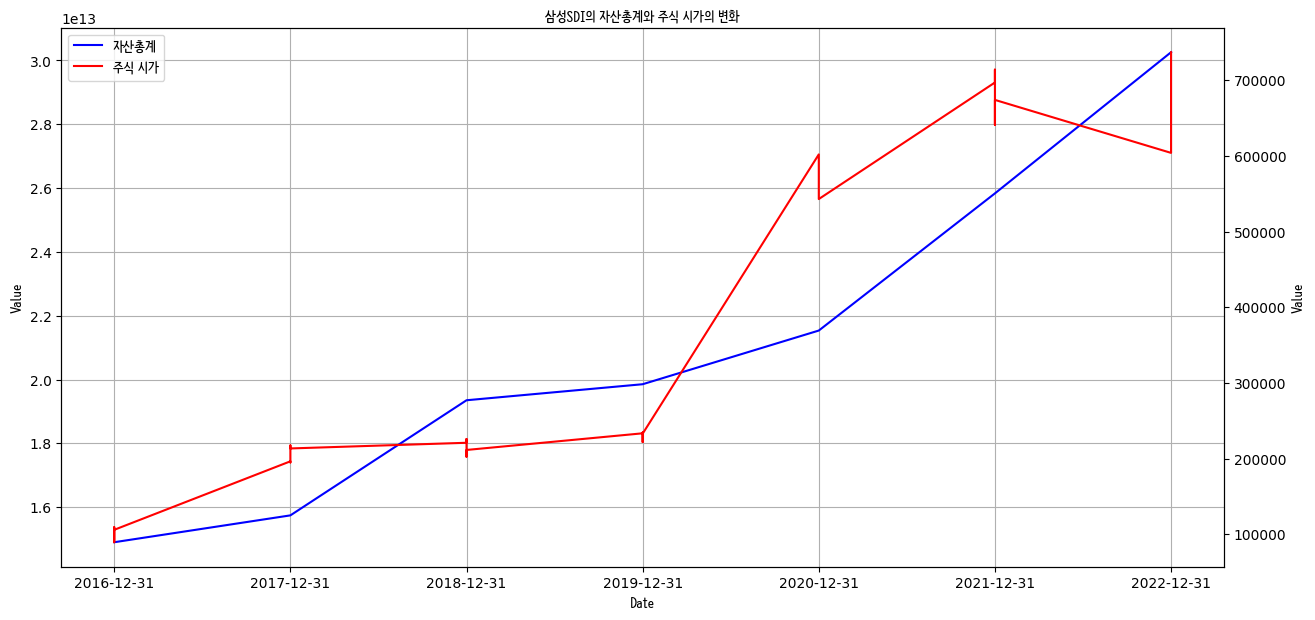

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

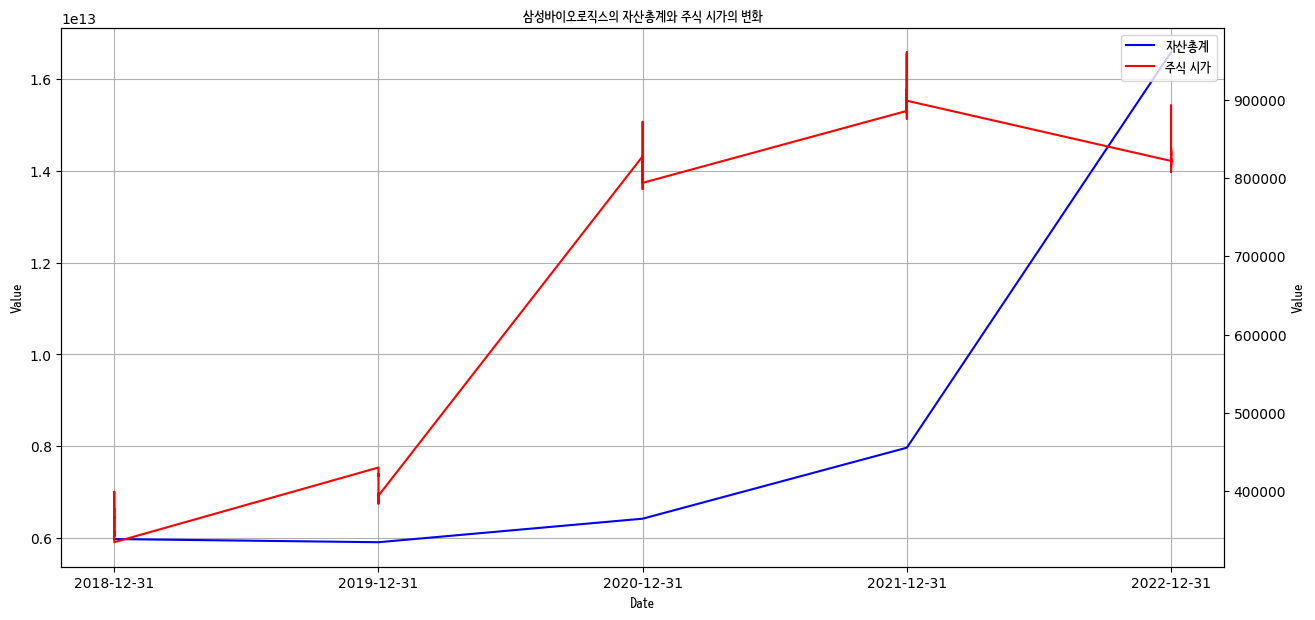

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

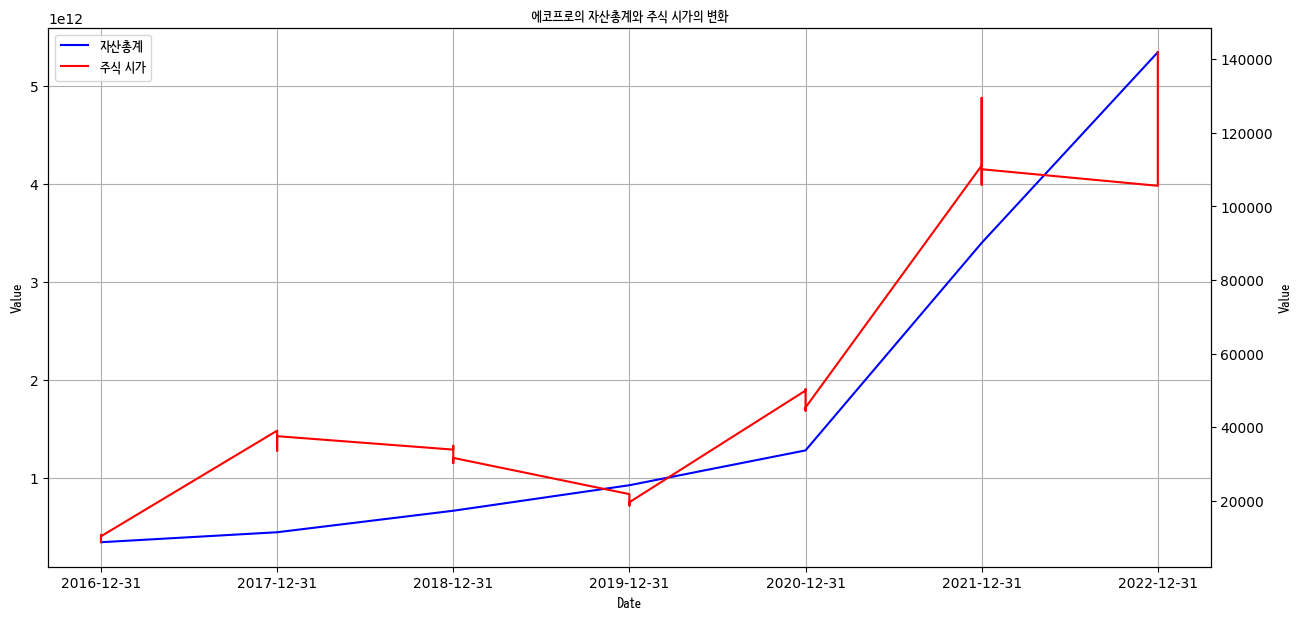

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

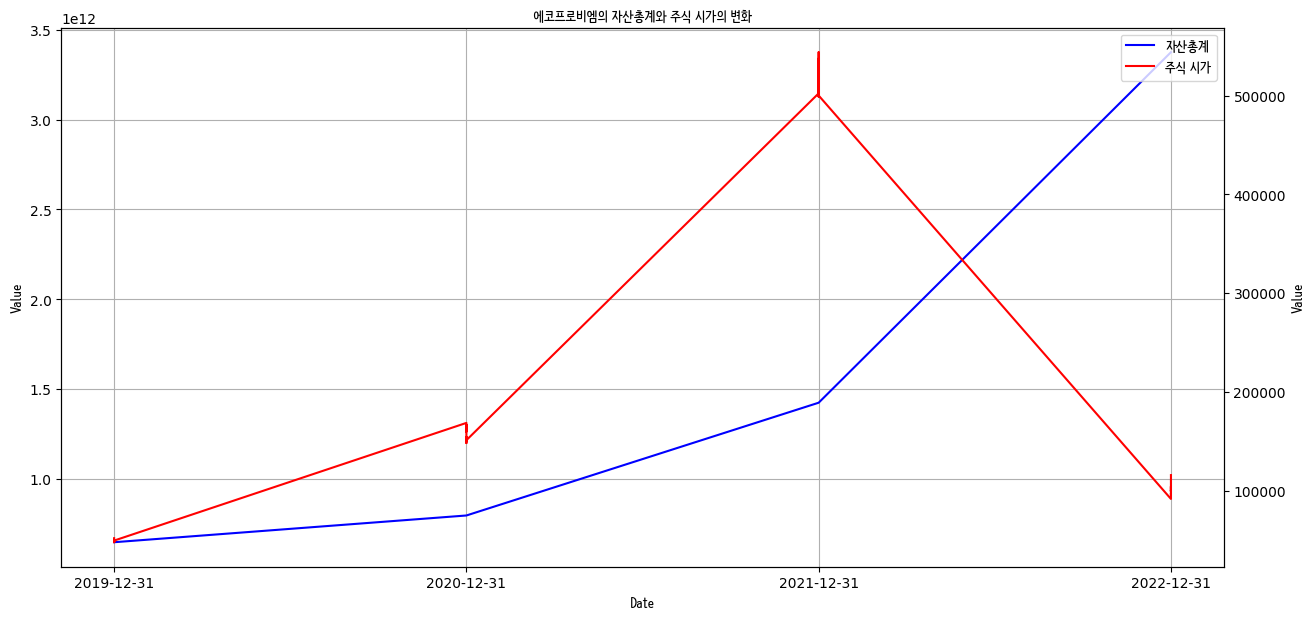

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

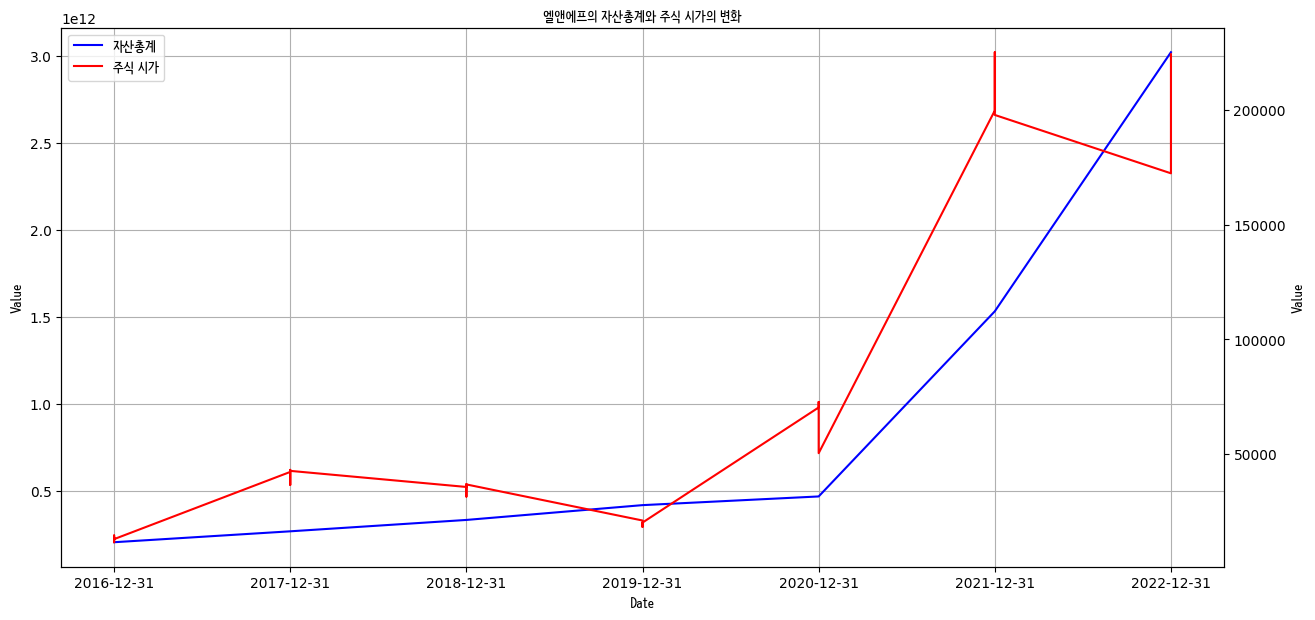

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

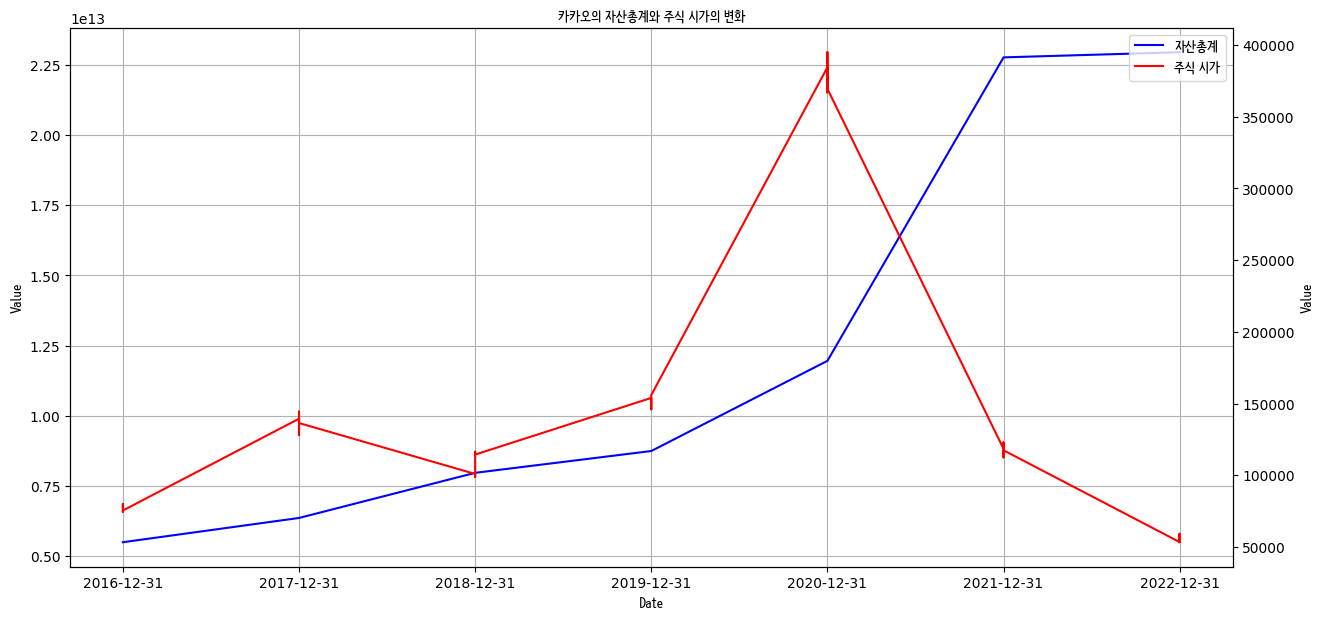

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

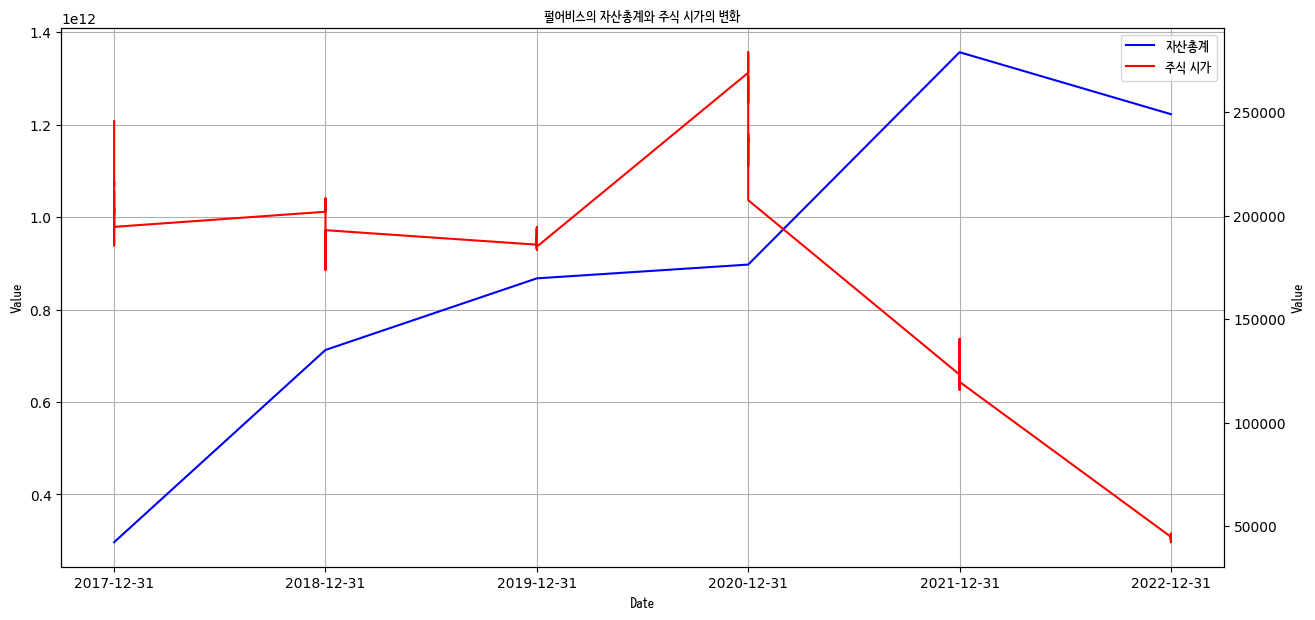

In [116]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf"
font_prop = FontProperties(fname=font_path)
# 1. CSV 파일 읽기
finance_df = pd.read_csv('cleaned_AnnualFinanceStatement_eda.csv')
stock_df = pd.read_csv('cleaned_StockDailyData.csv')

finance_df.rename(columns={'Data': 'Date'}, inplace=True)
stock_df.rename(columns={'stck_bsop_date': 'Date'}, inplace=True)

finance_df['Year_Month'] = finance_df['Date'].str.slice(0, 7)
stock_df['Year_Month'] = stock_df['Date'].str.slice(0, 7)

# 'Year_Month'와 'company'를 기준으로 두 데이터프레임을 병합합니다.
merged_df = pd.merge(finance_df, stock_df, on=['Year_Month', 'company'], how='inner')
# 자산총계에 대한 조건 필터링
debt_total_df = merged_df[(merged_df['class1'] == '자산') & (merged_df['class2'] == '자산총계')]

companies = debt_total_df['company'].unique()

for company in companies:
    company_df = debt_total_df[debt_total_df['company'] == company]
    
    fig, ax1 = plt.subplots(figsize=(15, 7))
    
    # finance_statement(자산총계) 그래프
    ax1.plot(company_df['Date_x'], company_df['finance_statement'], label='자산총계', color='blue')
    ax1.set_ylabel('Value', fontproperties=font_prop)
    ax1.tick_params(axis='y')
    
    # stck_oprc(주식 시가) 그래프
    ax2 = ax1.twinx()  # ax1과 x축을 공유하는 두 번째 y축 생성
    ax2.plot(company_df['Date_x'], company_df['stck_oprc'], label='주식 시가', color='red')
    ax2.set_ylabel('Value', fontproperties=font_prop)
    ax2.tick_params(axis='y')
    
    ax1.set_xlabel('Date', fontproperties=font_prop)
    ax1.set_title(f'{company}의 자산총계와 주식 시가의 변화', fontproperties=font_prop)
    
    # 범례 추가
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0, prop=font_prop)

    ax1.grid(True)
    plt.show()

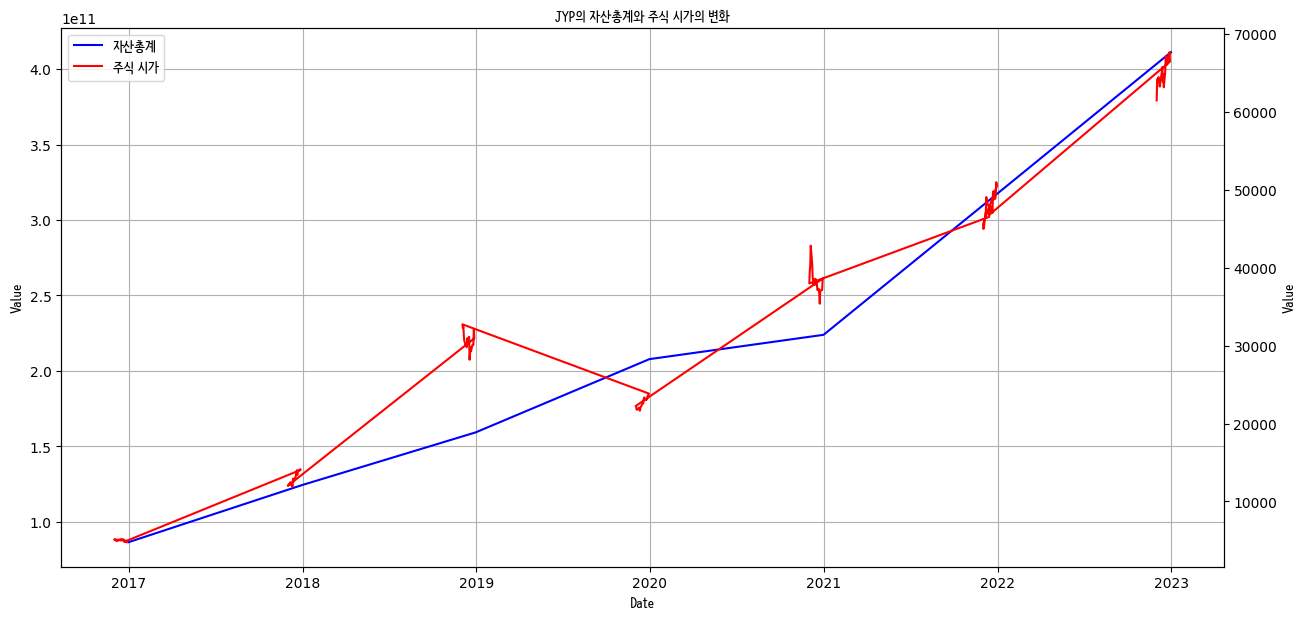

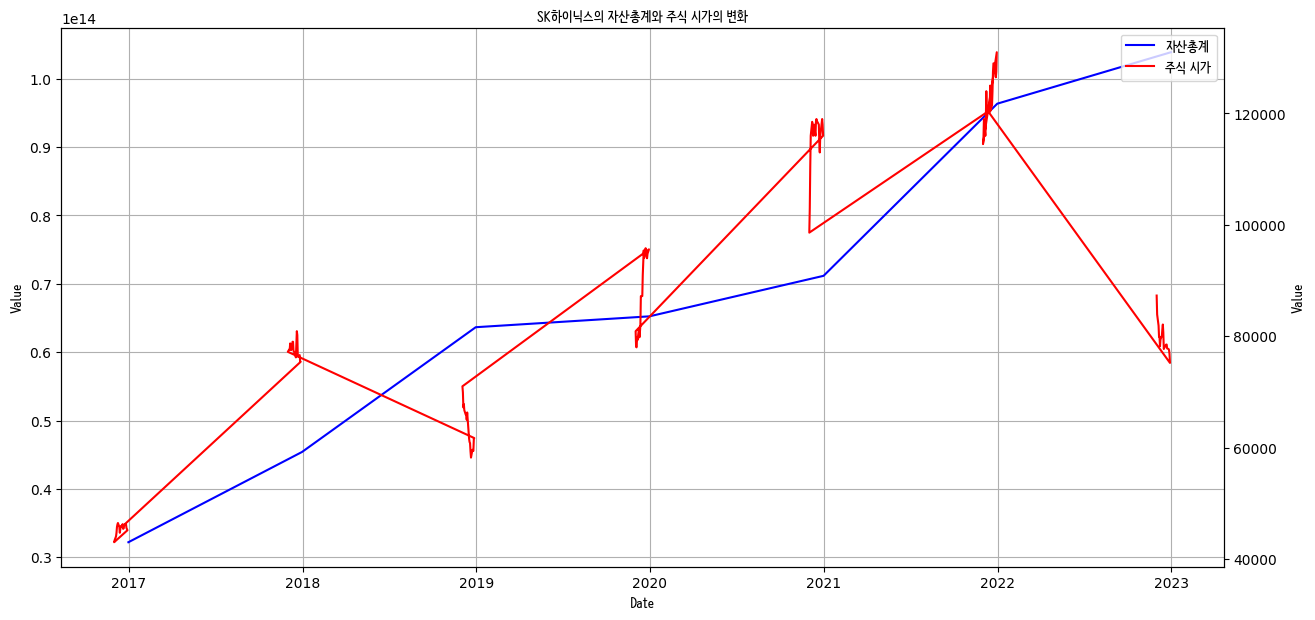

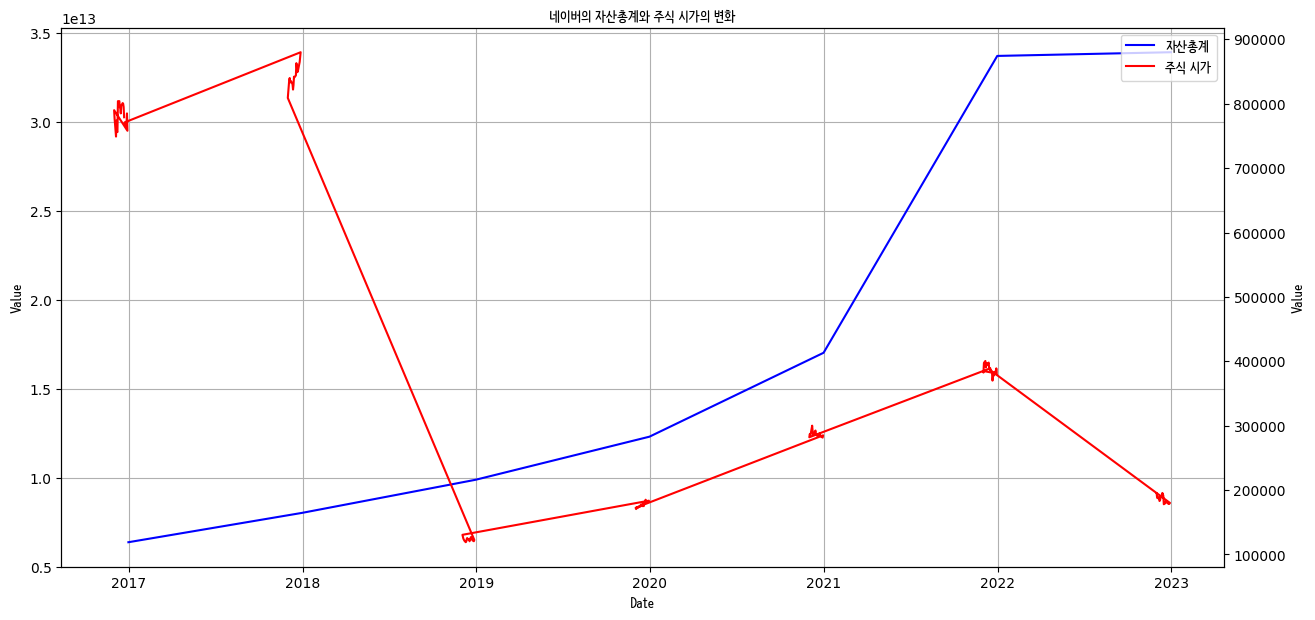

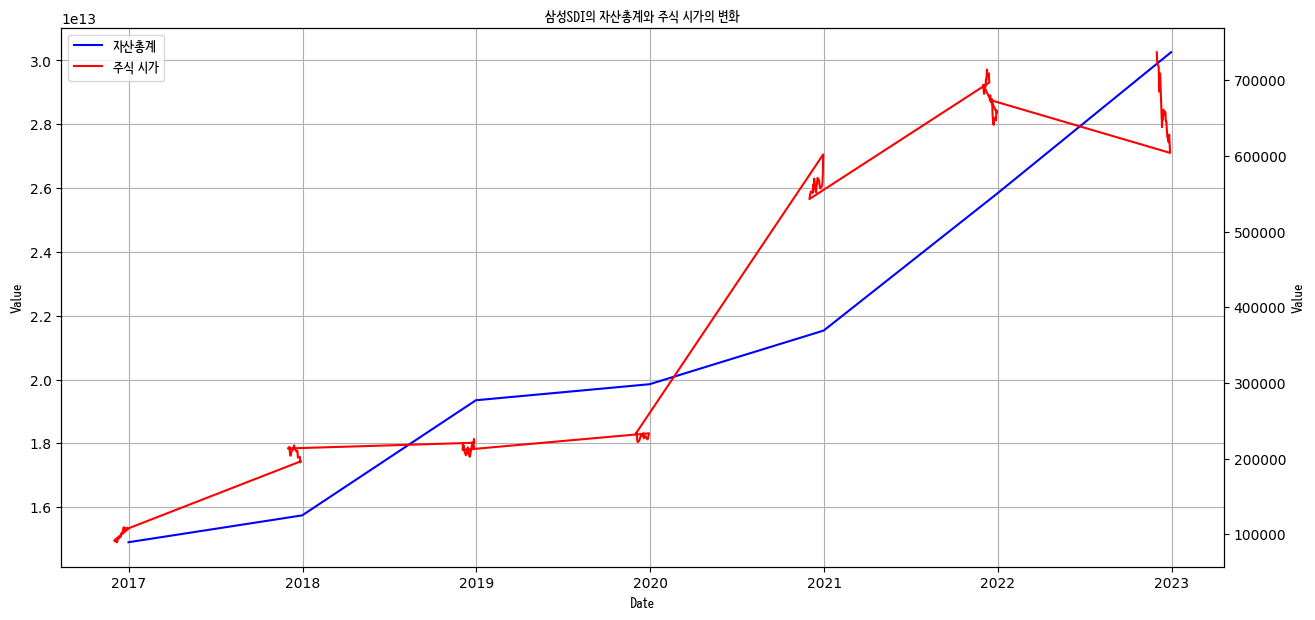

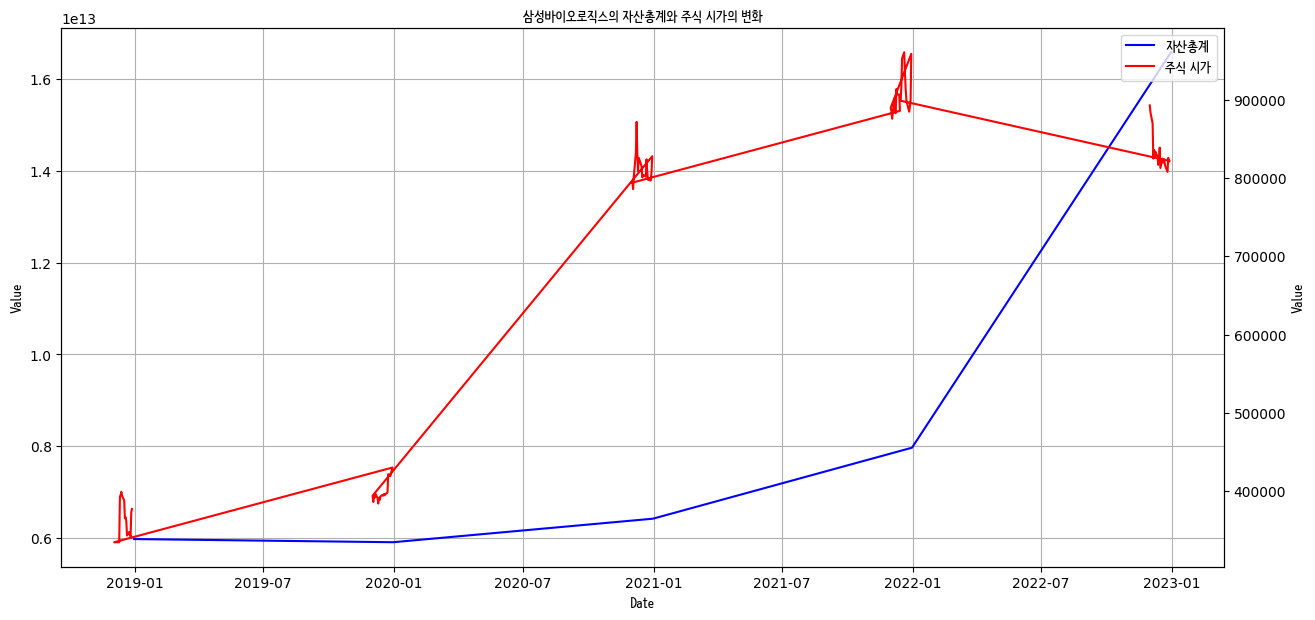

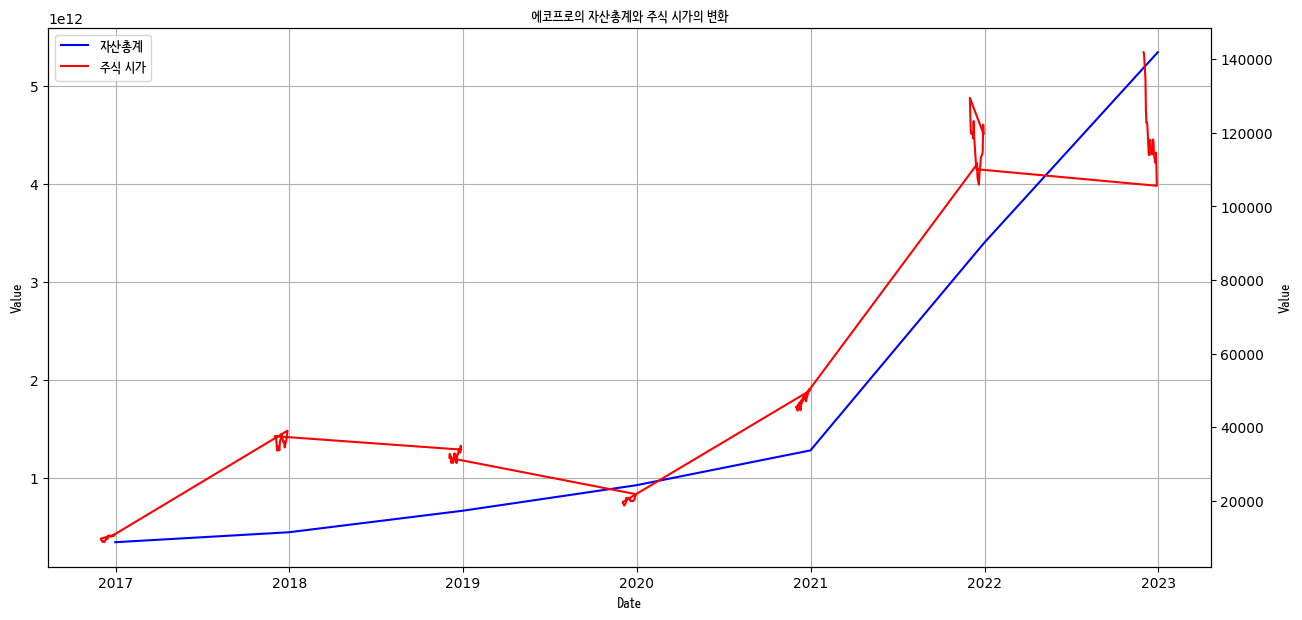

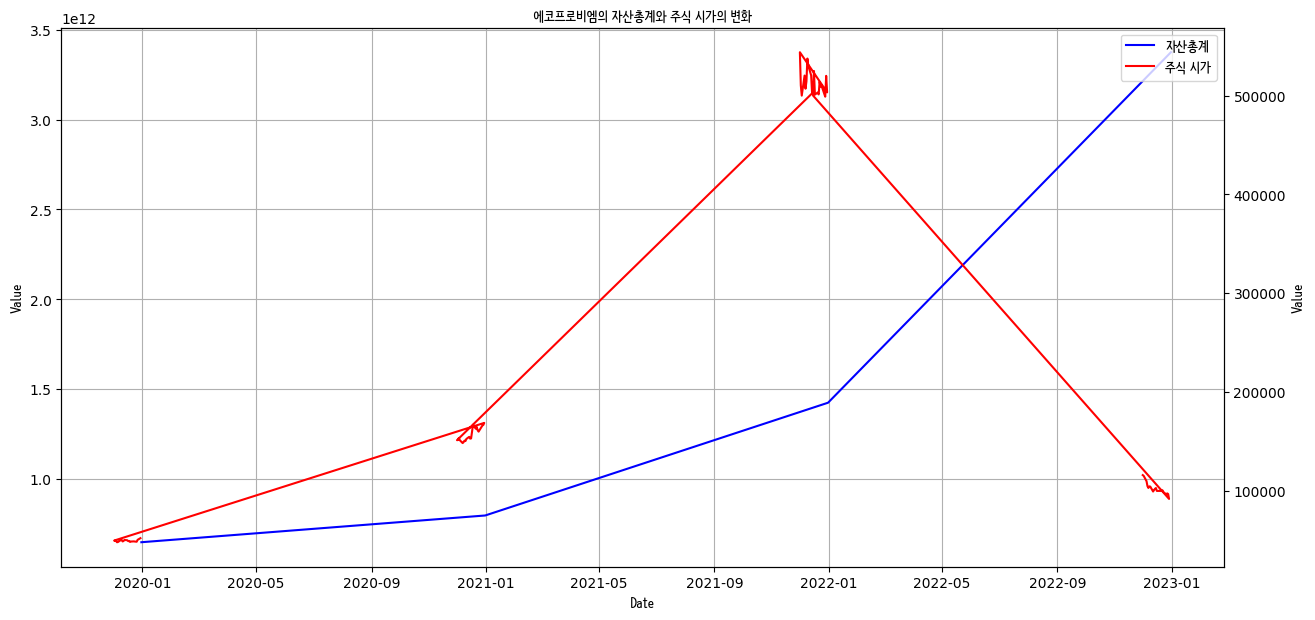

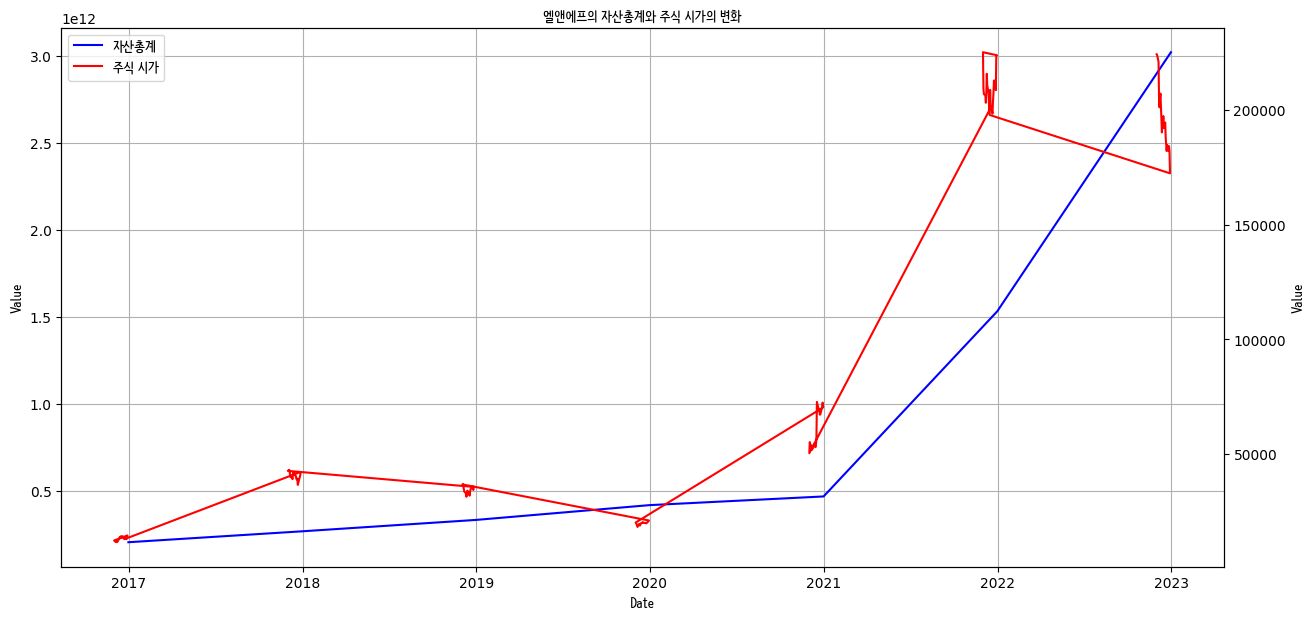

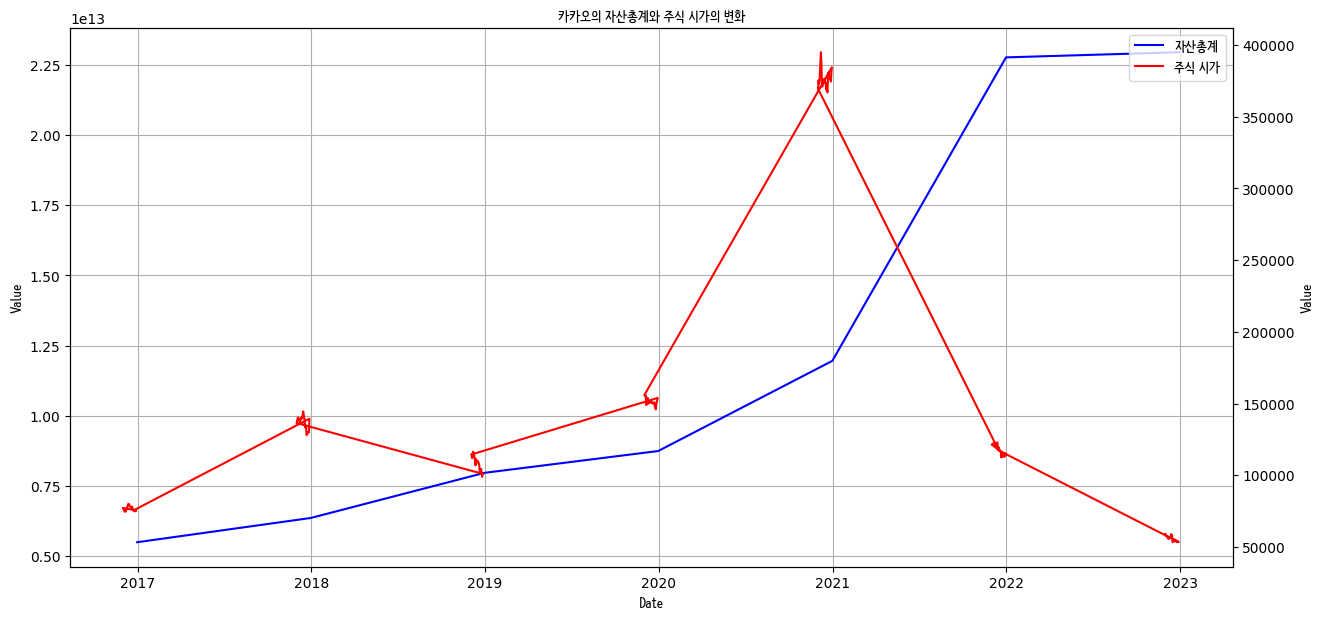

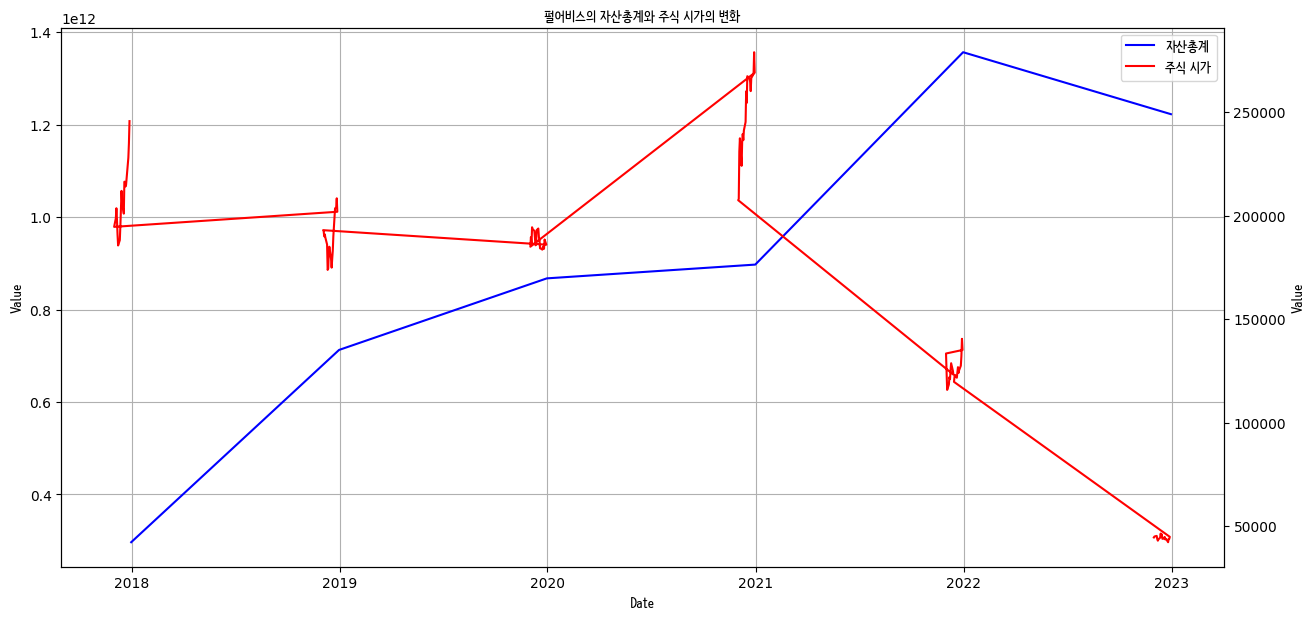

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf"
font_prop = FontProperties(fname=font_path)

# 1. CSV 파일 읽기
finance_df = pd.read_csv('cleaned_AnnualFinanceStatement_eda.csv')
stock_df = pd.read_csv('cleaned_StockDailyData.csv')

finance_df.rename(columns={'Data': 'Date'}, inplace=True)
stock_df.rename(columns={'stck_bsop_date': 'Date'}, inplace=True)

# 'Date' 컬럼을 datetime 형식으로 변환
finance_df['Date'] = pd.to_datetime(finance_df['Date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# 6개월 단위의 주식 데이터만 선택합니다.
stock_df = stock_df[stock_df['Date'].dt.month.isin([1, 2, 3, 4, 5, 6, 9, 10, 11, 12])]

# Year_Month column 생성
finance_df['Year_Month'] = finance_df['Date'].dt.strftime('%Y-%m')
stock_df['Year_Month'] = stock_df['Date'].dt.strftime('%Y-%m')

# 'Year_Month'와 'company'를 기준으로 두 데이터프레임을 병합합니다.
merged_df = pd.merge(finance_df, stock_df, on=['Year_Month', 'company'], how='inner')

# 자산총계에 대한 조건 필터링
debt_total_df = merged_df[(merged_df['class1'] == '자산') & (merged_df['class2'] == '자산총계')]

companies = debt_total_df['company'].unique()

for company in companies:
    company_df = debt_total_df[debt_total_df['company'] == company]
    
    fig, ax1 = plt.subplots(figsize=(15, 7))
    
    # finance_statement(자산총계) 그래프
    ax1.plot(company_df['Date_x'], company_df['finance_statement'], label='자산총계', color='blue')
    ax1.set_ylabel('Value', fontproperties=font_prop)
    ax1.tick_params(axis='y')
    
    # stck_oprc(주식 시가) 그래프
    ax2 = ax1.twinx()  # ax1과 x축을 공유하는 두 번째 y축 생성
    ax2.plot(company_df['Date_y'], company_df['stck_oprc'], label='주식 시가', color='red')
    ax2.set_ylabel('Value', fontproperties=font_prop)
    ax2.tick_params(axis='y')
    
    ax1.set_xlabel('Date', fontproperties=font_prop)
    ax1.set_title(f'{company}의 자산총계와 주식 시가의 변화', fontproperties=font_prop)
    
    # 범례 추가
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0, prop=font_prop)

    ax1.grid(True)
    plt.show()

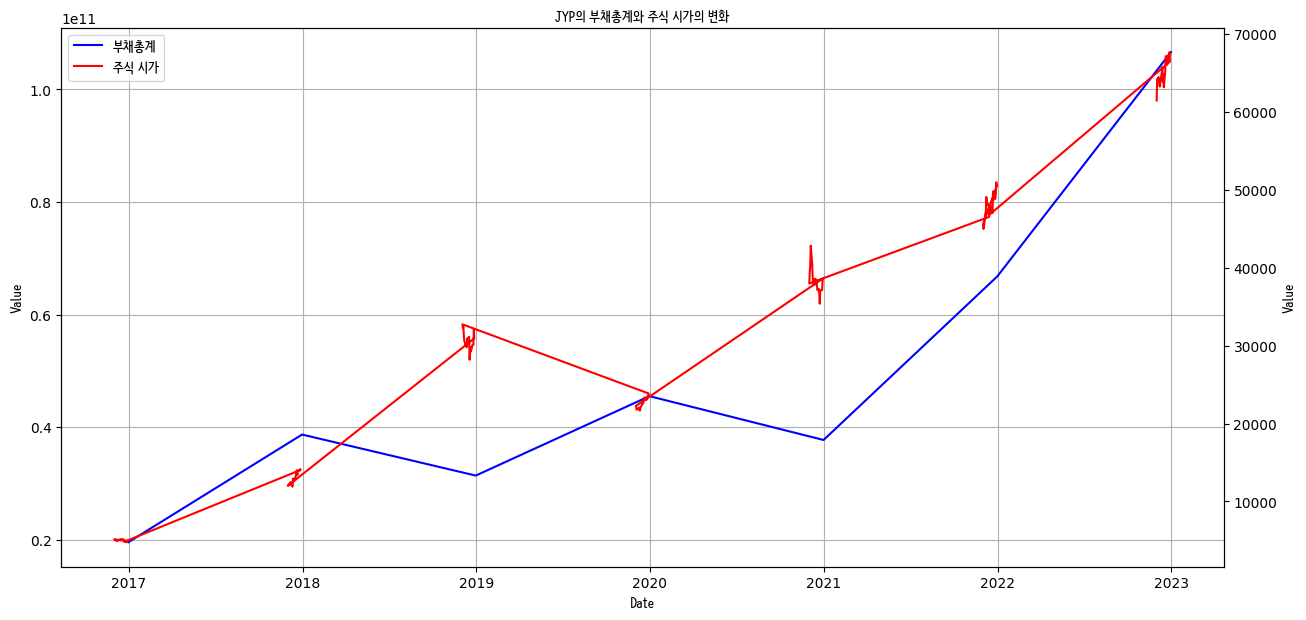

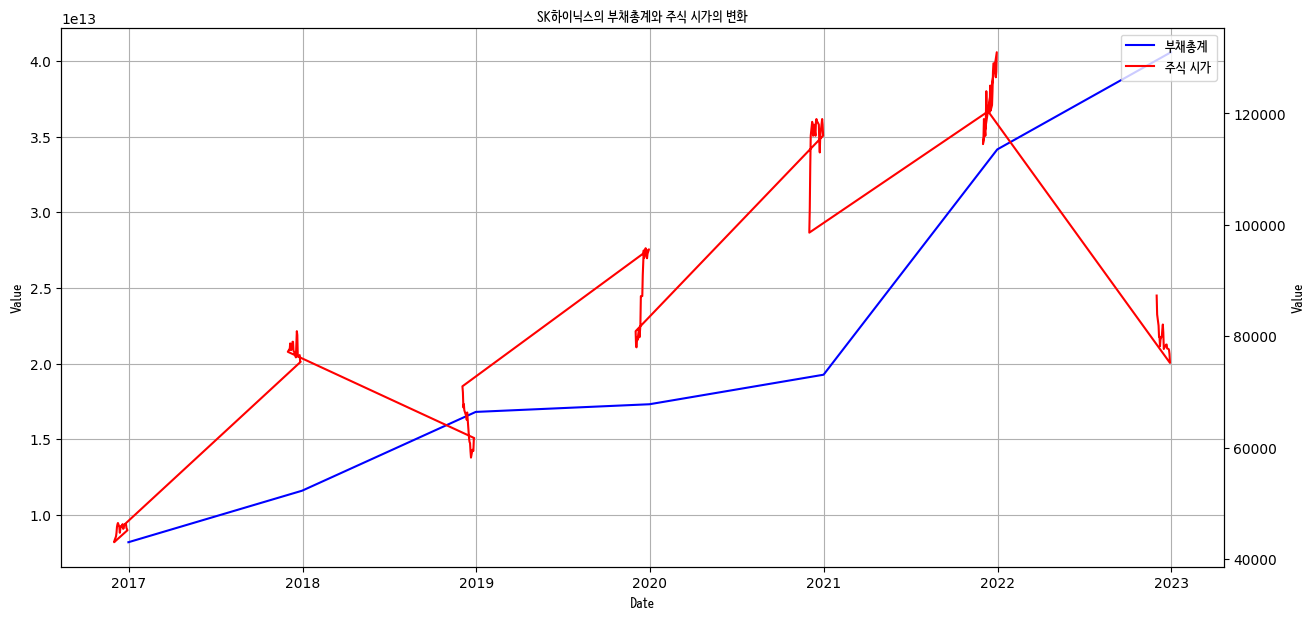

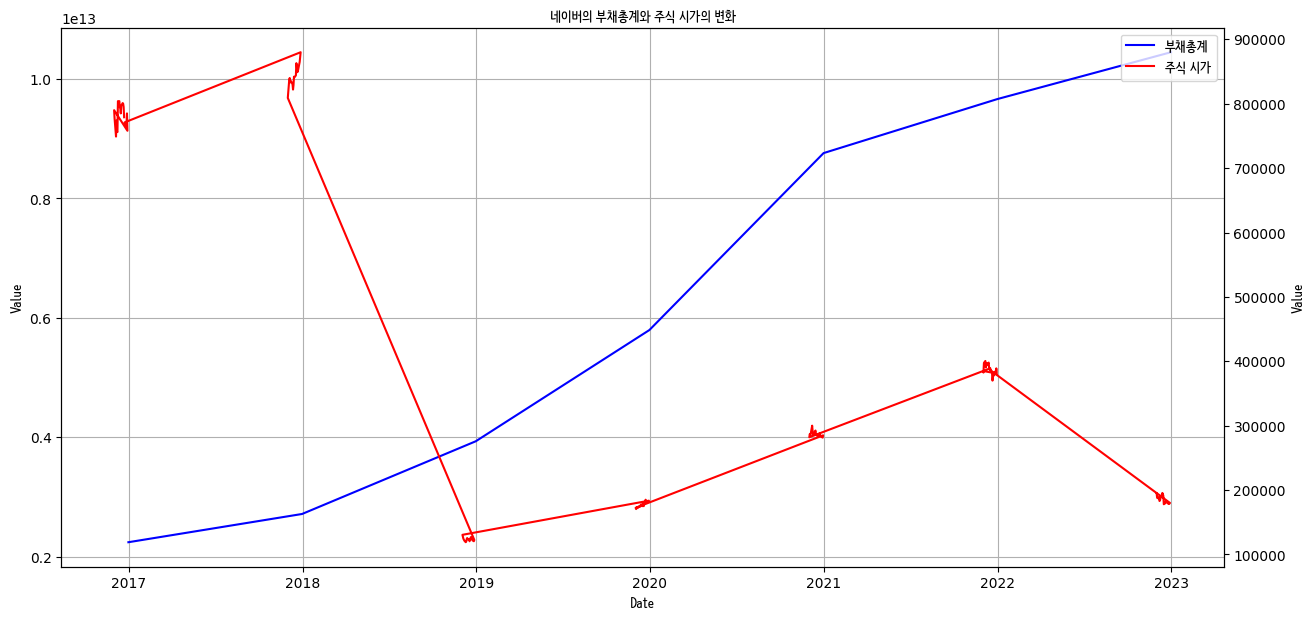

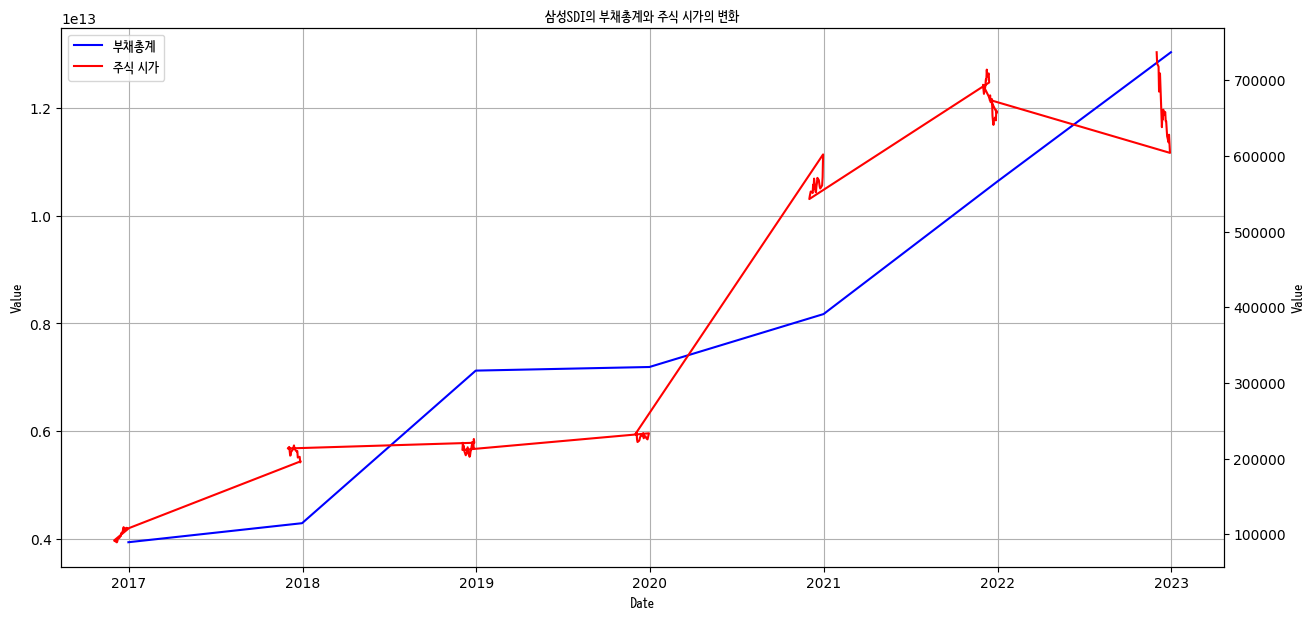

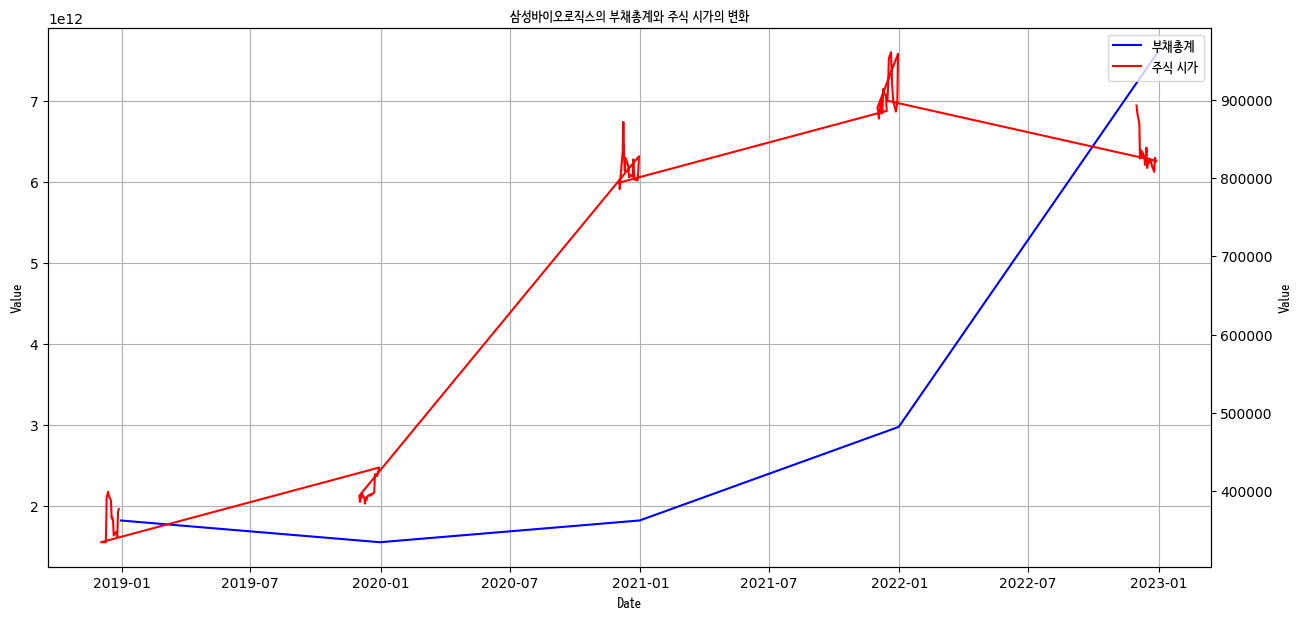

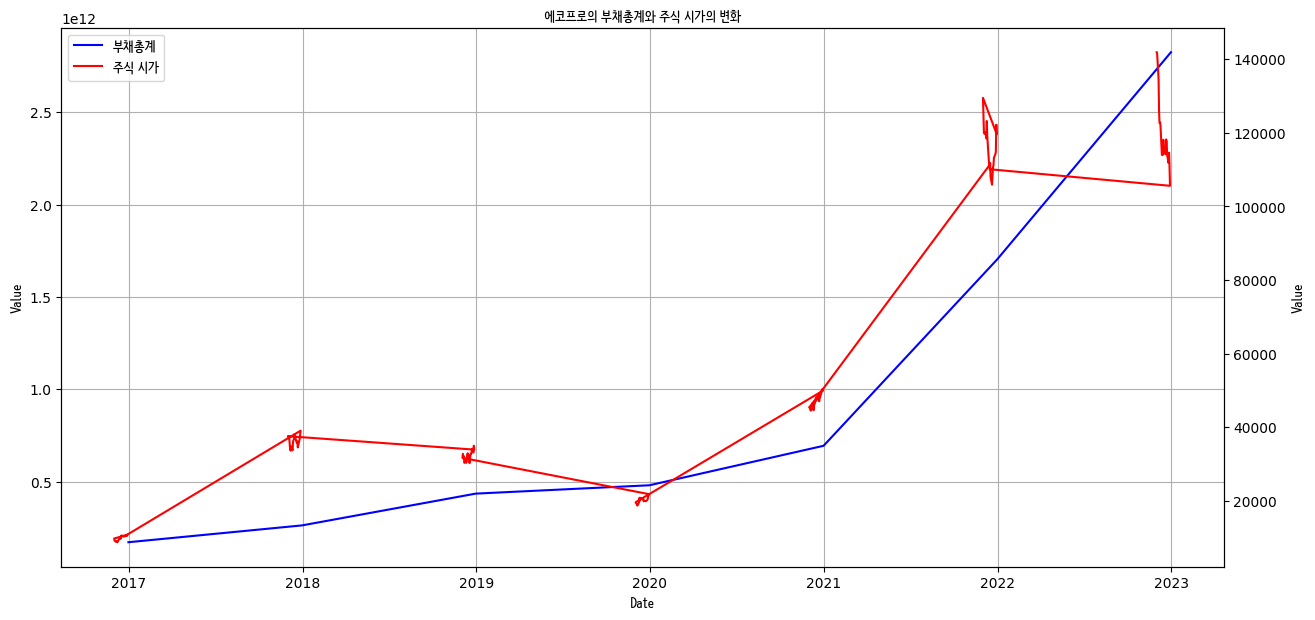

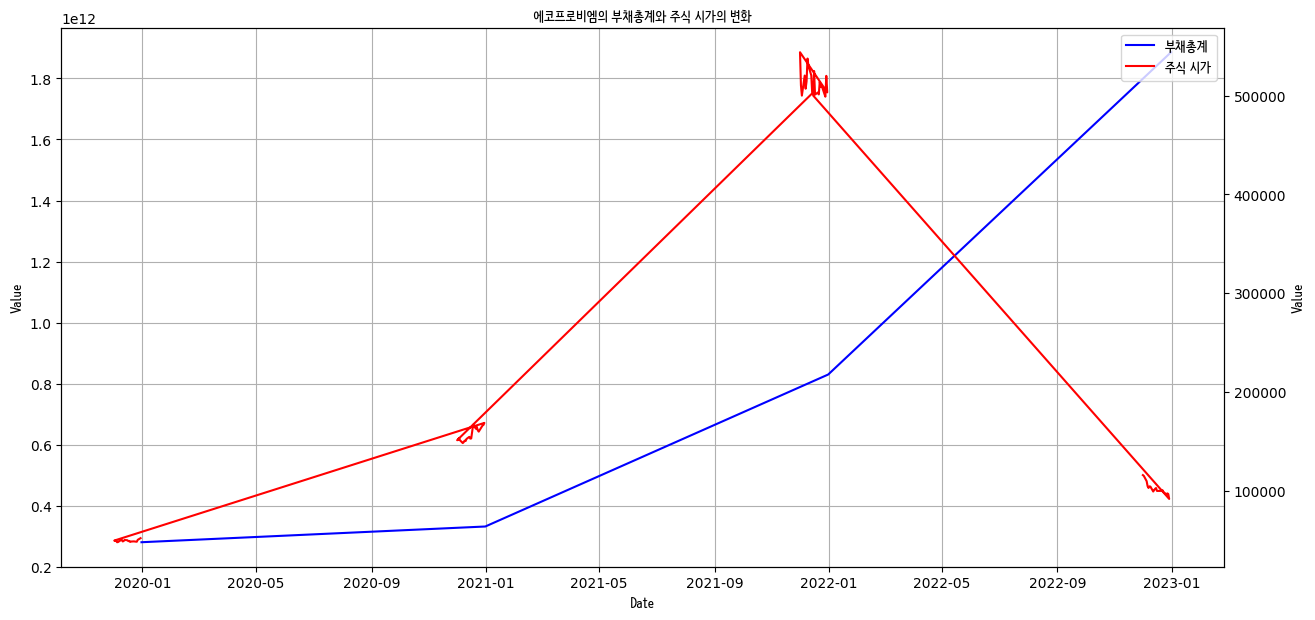

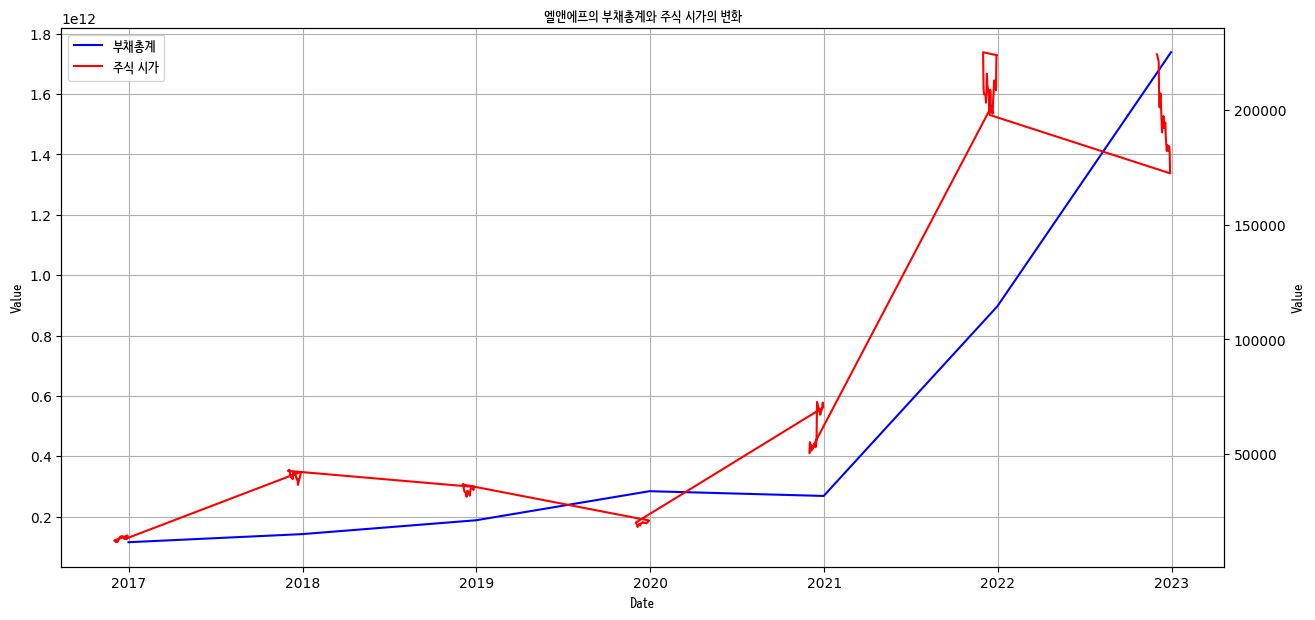

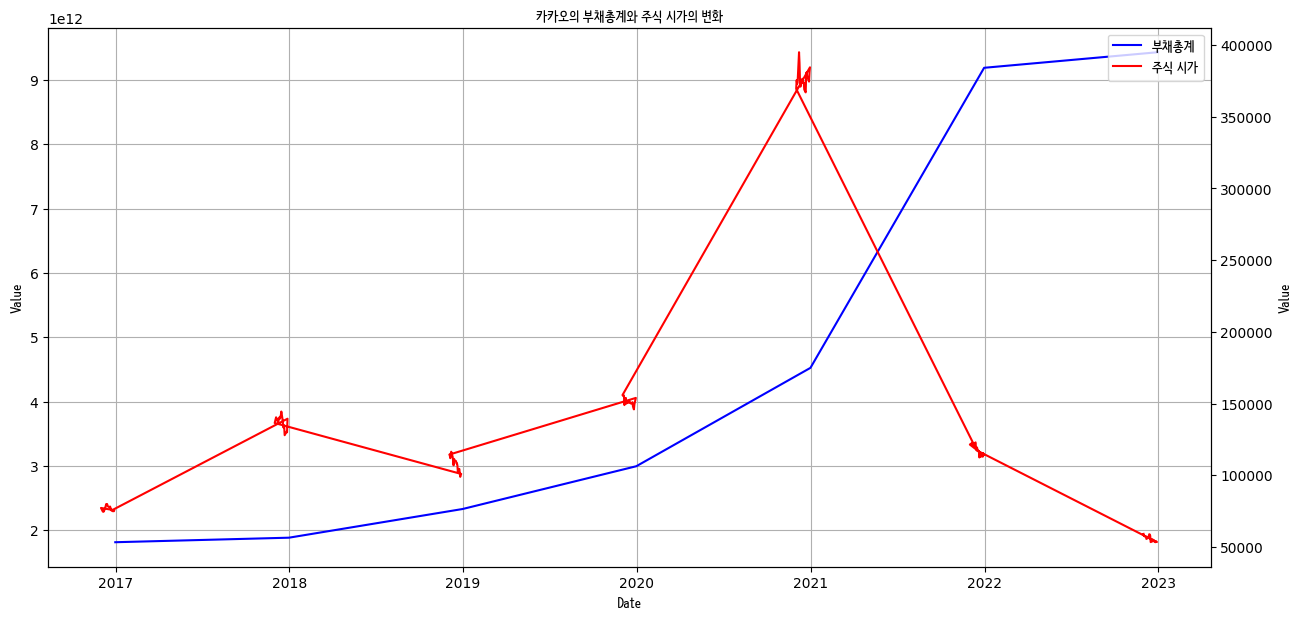

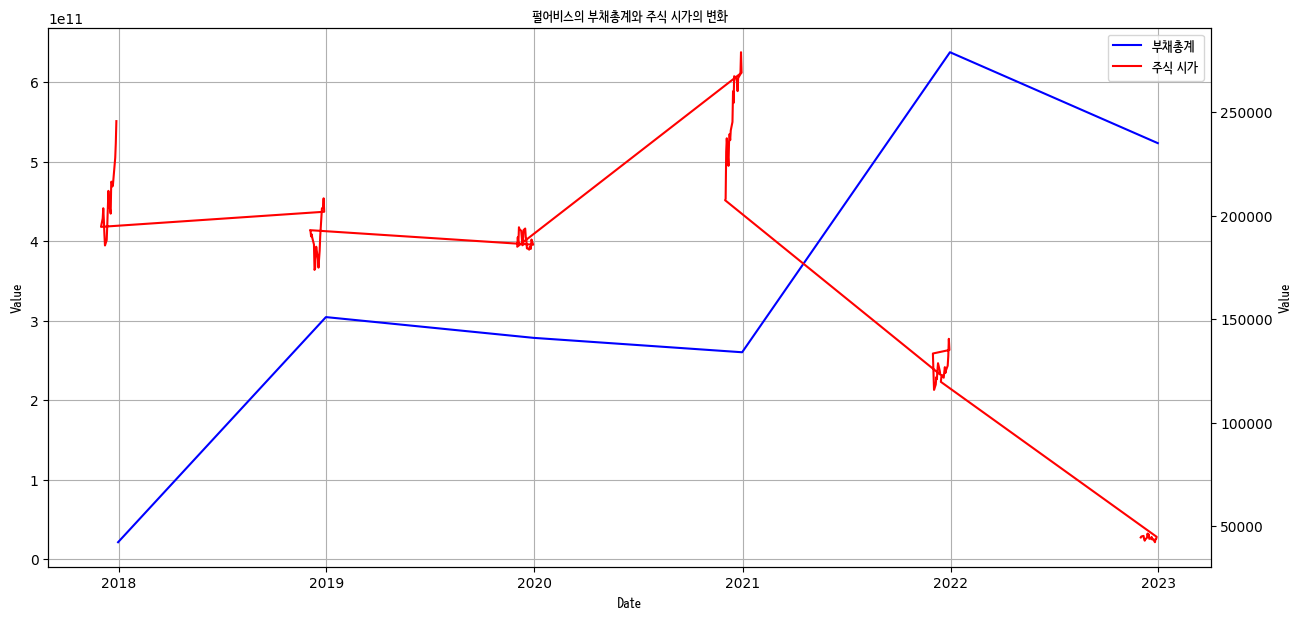

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf"
font_prop = FontProperties(fname=font_path)

# 1. CSV 파일 읽기
finance_df = pd.read_csv('cleaned_AnnualFinanceStatement_eda.csv')
stock_df = pd.read_csv('cleaned_StockDailyData.csv')

finance_df.rename(columns={'Data': 'Date'}, inplace=True)
stock_df.rename(columns={'stck_bsop_date': 'Date'}, inplace=True)

# 'Date' 컬럼을 datetime 형식으로 변환
finance_df['Date'] = pd.to_datetime(finance_df['Date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# 6개월 단위의 주식 데이터만 선택합니다.
stock_df = stock_df[stock_df['Date'].dt.month.isin([1, 2, 3, 4, 5, 6, 9, 10, 11, 12])]

# Year_Month column 생성
finance_df['Year_Month'] = finance_df['Date'].dt.strftime('%Y-%m')
stock_df['Year_Month'] = stock_df['Date'].dt.strftime('%Y-%m')

# 'Year_Month'와 'company'를 기준으로 두 데이터프레임을 병합합니다.
merged_df = pd.merge(finance_df, stock_df, on=['Year_Month', 'company'], how='inner')

# 부채총계에 대한 조건 필터링
debt_total_df = merged_df[(merged_df['class1'] == '부채') & (merged_df['class2'] == '부채총계')]

companies = debt_total_df['company'].unique()

for company in companies:
    company_df = debt_total_df[debt_total_df['company'] == company]
    
    fig, ax1 = plt.subplots(figsize=(15, 7))
    
    # finance_statement(부채총계) 그래프
    ax1.plot(company_df['Date_x'], company_df['finance_statement'], label='부채총계', color='blue')
    ax1.set_ylabel('Value', fontproperties=font_prop)
    ax1.tick_params(axis='y')
    
    # stck_oprc(주식 시가) 그래프
    ax2 = ax1.twinx()  # ax1과 x축을 공유하는 두 번째 y축 생성
    ax2.plot(company_df['Date_y'], company_df['stck_oprc'], label='주식 시가', color='red')
    ax2.set_ylabel('Value', fontproperties=font_prop)
    ax2.tick_params(axis='y')
    
    ax1.set_xlabel('Date', fontproperties=font_prop)
    ax1.set_title(f'{company}의 부채총계와 주식 시가의 변화', fontproperties=font_prop)
    
    # 범례 추가
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0, prop=font_prop)

    ax1.grid(True)
    plt.show()

/tmp/ipykernel_262/2502056500.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heatmap_data.corr(), linewidths = 0.1, vmax = 1.0,


<AxesSubplot: title={'center': 'Correlation without Missing Values'}>

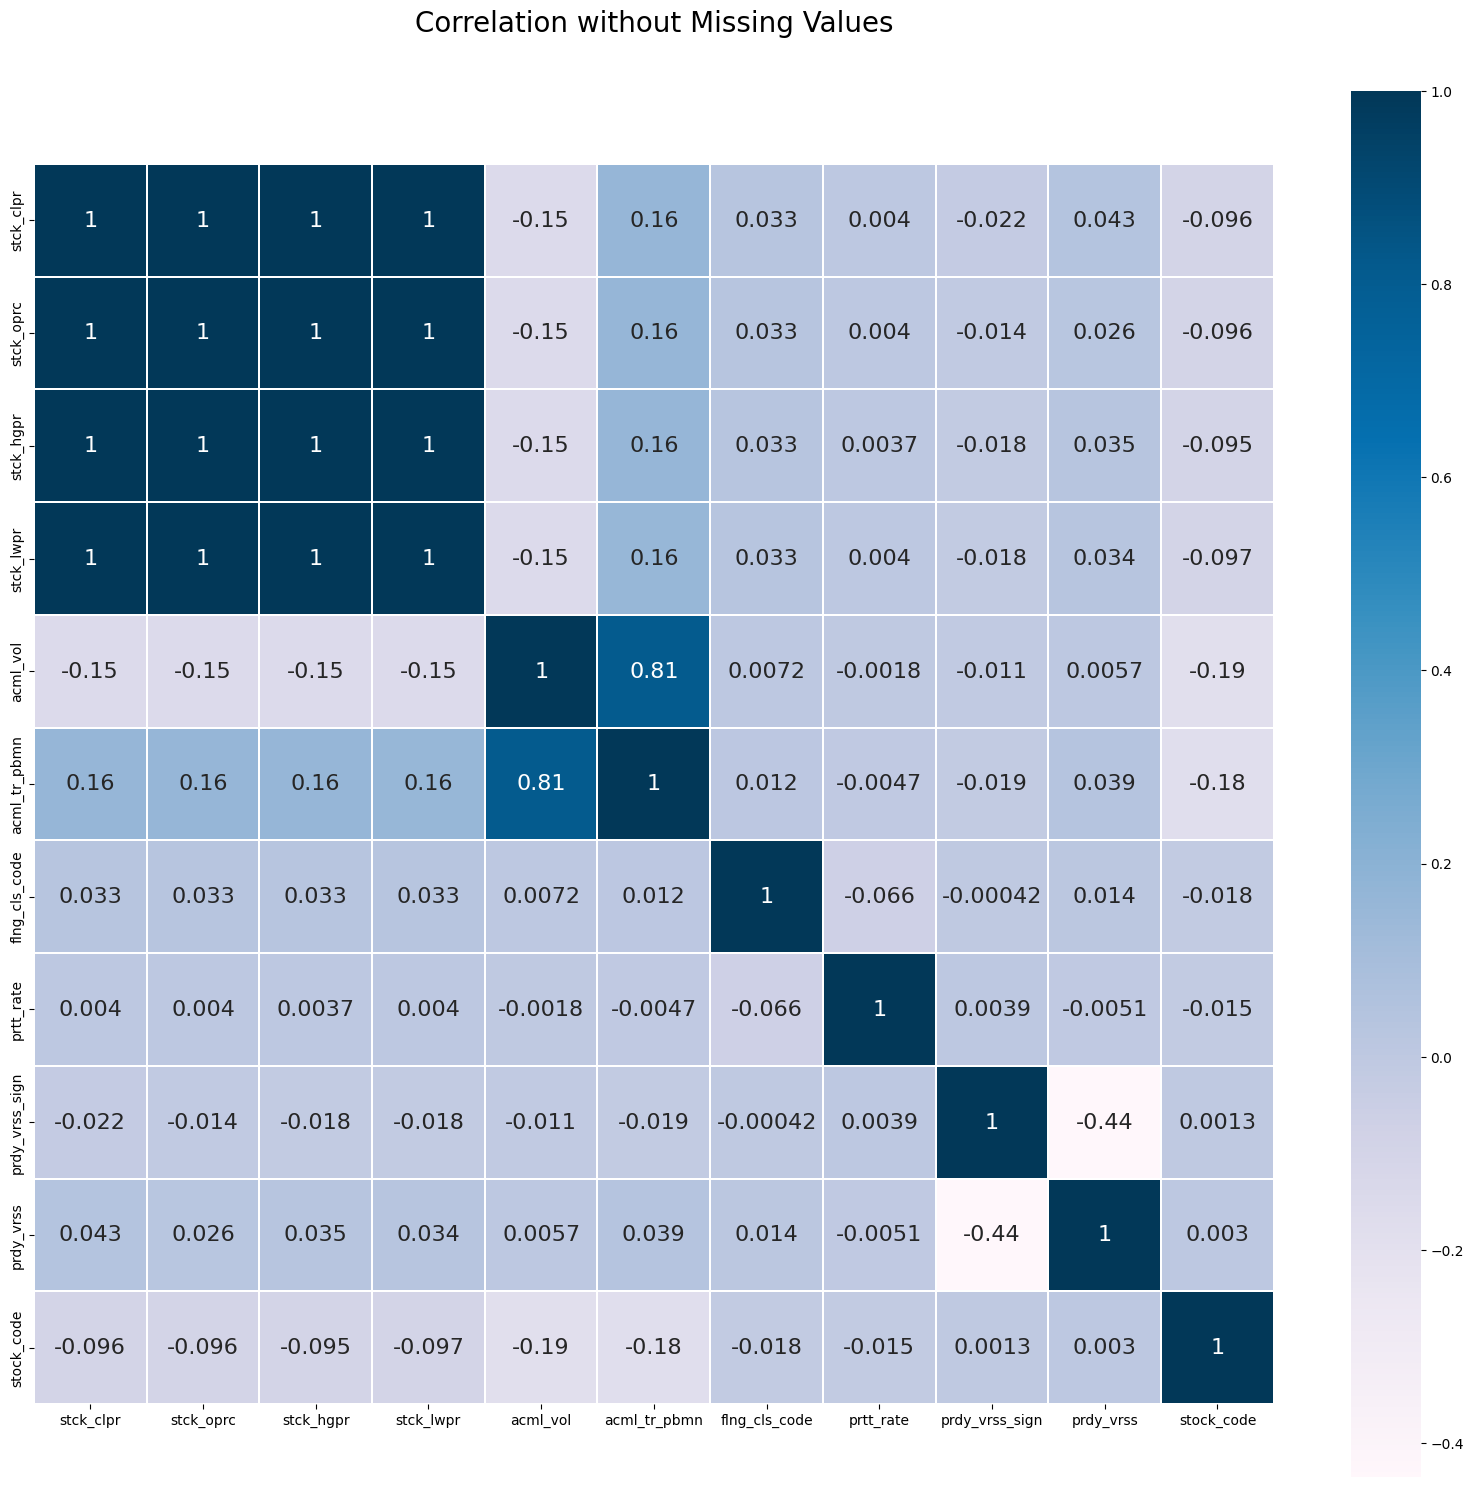

In [36]:
# 결측치 상관관계
# import missingno as msno
# import matplotlib.pyplot as plt
# import pandas as pd
# df = pd.read_csv("StockDailyData.csv")
# missing_data = df.columns[df.isnull().any()].tolist()
# msno.heatmap(df[missing_data], figsize=(8,6))
# plt.title("Correlation with Missing Values", fontsize = 20)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_StockDailyData.csv")
heatmap_data = df
colormap = plt.cm.PuBu
plt.figure(figsize=(20,18))
plt.title("Correlation without Missing Values", y = 1.1,size = 20)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
